<a href="https://colab.research.google.com/github/cosbyyeung/predict-customer-churn/blob/master/Customer_Churn_Coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import and Preperation

In [0]:
#the subscript 1, 2, 3 on variables means it belongs to dataset 1,2 and 3 resp.

In [0]:
# import library used for data management
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

In [0]:
#****For this code, after it load, there is a link, click the link and do whatever
#***it ask u to do, and finally the page will show a link, copy that link and paste
#***the link in the textbox under these codes.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1T514QoLEyomPg31DJFAplq9ujKBioBge' # The shareable link

In [0]:
fluff, id = link.split('=')
print (id) 

1T514QoLEyomPg31DJFAplq9ujKBioBge


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('WA_Fn-UseC_-Telco-Customer-Churn.csv')  
customer_churn = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv',index_col='customerID')


In [0]:
customer_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [0]:
#Use this in jyupter notebook
#customer_churn = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv',index_col='customerID')

In [0]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [0]:
#get X and y list
features = list(customer_churn.columns)
features.remove('Churn')
target = ['Churn']

In [0]:
X = customer_churn[features]
y = customer_churn[target]

In [0]:
# import train split function
from sklearn.model_selection import train_test_split

## Cleaned Dataset 1

In [0]:
train_1, test_1,y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2, random_state = 10)

In [0]:
#View data information
display(train_1.info(), test_1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 3164-YAXFY to 9968-FFVVH
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5634 non-null   object 
 1   SeniorCitizen     5634 non-null   int64  
 2   Partner           5634 non-null   object 
 3   Dependents        5634 non-null   object 
 4   tenure            5634 non-null   int64  
 5   PhoneService      5634 non-null   object 
 6   MultipleLines     5634 non-null   object 
 7   InternetService   5634 non-null   object 
 8   OnlineSecurity    5634 non-null   object 
 9   OnlineBackup      5634 non-null   object 
 10  DeviceProtection  5634 non-null   object 
 11  TechSupport       5634 non-null   object 
 12  StreamingTV       5634 non-null   object 
 13  StreamingMovies   5634 non-null   object 
 14  Contract          5634 non-null   object 
 15  PaperlessBilling  5634 non-null   object 
 16  PaymentMethod     5634 non-null 

None

None

In [0]:
display('train_1', train_1.describe(),'test_1', test_1.describe())

'train_1'

,SeniorCitizen,tenure,MonthlyCharges
count,5634.000000,5634.000000,5634.000000
mean,0.163117,32.298367,64.904766
std,0.369505,24.552553,30.020923
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.825000
50%,0.000000,29.000000,70.400000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


'test_1'

,SeniorCitizen,tenure,MonthlyCharges
count,1409.000000,1409.000000,1409.000000
mean,0.158268,32.662172,64.189603
std,0.365122,24.593733,30.368866
min,0.000000,0.000000,18.800000
25%,0.000000,9.000000,30.750000
50%,0.000000,28.000000,70.200000
75%,0.000000,56.000000,90.050000
max,1.000000,72.000000,118.200000


## Change the data type

In [0]:
# Change data type from numeric to categorical
train_1.loc[:, 'SeniorCitizen'] = train_1.loc[:, 'SeniorCitizen'].astype(str)
test_1.loc[:, 'SeniorCitizen'] = test_1.loc[:, 'SeniorCitizen'].astype(str)

In [0]:
# Change data type from categorical to numeric
train_1.loc[:, 'TotalCharges'] = pd.to_numeric(train_1.loc[:, 'TotalCharges'], errors='coerce')
test_1.loc[:, 'TotalCharges'] = pd.to_numeric(test_1.loc[:, 'TotalCharges'], errors='coerce')


In [0]:
#some attributes appears missing values after coverting them to type float
#their original values are empty
display('train_1', train_1.isnull().sum(), 'test_1', test_1.isnull().sum())

'train_1'

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
dtype: int64

'test_1'

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        1
dtype: int64

In [0]:
#display description of all catergorial variables of training set
for col in ['gender','SeniorCitizen','Partner','Dependents', \
            'PhoneService','MultipleLines','InternetService', \
            'OnlineSecurity','OnlineBackup','DeviceProtection', \
            'TechSupport','StreamingTV','StreamingMovies', \
            'Contract','PaperlessBilling','PaymentMethod', \
            'TotalCharges']:
    display(train_1[col].describe())

count     5634
unique       2
top       Male
freq      2832
Name: gender, dtype: object

count     5634
unique       2
top          0
freq      4715
Name: SeniorCitizen, dtype: object

count     5634
unique       2
top         No
freq      2907
Name: Partner, dtype: object

count     5634
unique       2
top         No
freq      3928
Name: Dependents, dtype: object

count     5634
unique       2
top        Yes
freq      5088
Name: PhoneService, dtype: object

count     5634
unique       3
top         No
freq      2717
Name: MultipleLines, dtype: object

count            5634
unique              3
top       Fiber optic
freq             2494
Name: InternetService, dtype: object

count     5634
unique       3
top         No
freq      2827
Name: OnlineSecurity, dtype: object

count     5634
unique       3
top         No
freq      2483
Name: OnlineBackup, dtype: object

count     5634
unique       3
top         No
freq      2471
Name: DeviceProtection, dtype: object

count     5634
unique       3
top         No
freq      2802
Name: TechSupport, dtype: object

count     5634
unique       3
top         No
freq      2250
Name: StreamingTV, dtype: object

count     5634
unique       3
top         No
freq      2248
Name: StreamingMovies, dtype: object

count               5634
unique                 3
top       Month-to-month
freq                3117
Name: Contract, dtype: object

count     5634
unique       2
top        Yes
freq      3351
Name: PaperlessBilling, dtype: object

count                 5634
unique                   4
top       Electronic check
freq                  1892
Name: PaymentMethod, dtype: object

count    5624.000000
mean     2278.508161
std      2259.459696
min        18.850000
25%       396.250000
50%      1395.525000
75%      3773.450000
max      8684.800000
Name: TotalCharges, dtype: float64

In [0]:
#display description of total charges of testing set
test_1['TotalCharges'].describe()

count    1408.000000
mean     2302.442330
std      2296.454966
min        18.800000
25%       417.800000
50%      1406.450000
75%      3893.762500
max      8547.150000
Name: TotalCharges, dtype: float64

In [0]:
display('train_1', train_1.describe(), 'test_1', test_1.describe())

'train_1'

,tenure,MonthlyCharges,TotalCharges
count,5634.000000,5634.000000,5624.000000
mean,32.298367,64.904766,2278.508161
std,24.552553,30.020923,2259.459696
min,0.000000,18.250000,18.850000
25%,9.000000,35.825000,396.250000
50%,29.000000,70.400000,1395.525000
75%,55.000000,89.850000,3773.450000
max,72.000000,118.750000,8684.800000


'test_1'

,tenure,MonthlyCharges,TotalCharges
count,1409.000000,1409.000000,1408.000000
mean,32.662172,64.189603,2302.442330
std,24.593733,30.368866,2296.454966
min,0.000000,18.800000,18.800000
25%,9.000000,30.750000,417.800000
50%,28.000000,70.200000,1406.450000
75%,56.000000,90.050000,3893.762500
max,72.000000,118.200000,8547.150000


## Handle missing values

In [0]:
#show missing values of training set and testing set in TotalCharges
display('train_1', train_1[train_1['TotalCharges'].isnull()], 'test_1', test_1[test_1['TotalCharges'].isnull()])

'train_1'

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,
2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN
4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN
4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN


'test_1'

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,
3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN


In [0]:
# replace missing value in "TotalCharges" with mean
train_1['TotalCharges'].fillna(train_1['TotalCharges'].mean(),inplace = True)
test_1['TotalCharges'].fillna(train_1['TotalCharges'].mean(),inplace = True)

## One-hot Encoding

In [0]:
# get dummy variables for categorical varialbes
# one-hot encoding
genderdummy =pd.get_dummies(train_1['gender'],prefix ='gender')
genderdummy1 =pd.get_dummies(test_1['gender'],prefix ='gender')
Partnerdummy =pd.get_dummies(train_1['Partner'],prefix ='Partner')
Partnerdummy1 =pd.get_dummies(test_1['Partner'],prefix ='Partner')
Dependentsdummy =pd.get_dummies(train_1['Dependents'],prefix ='Dependents')
Dependentsdummy1 =pd.get_dummies(test_1['Dependents'],prefix ='Dependents')
PhoneServicedummy =pd.get_dummies(train_1['PhoneService'],prefix ='PhoneService')
PhoneServicedummy1 =pd.get_dummies(test_1['PhoneService'],prefix ='PhoneService')
MultipleLinesdummy =pd.get_dummies(train_1['MultipleLines'],prefix ='MultipleLines')
MultipleLinesdummy1 =pd.get_dummies(test_1['MultipleLines'],prefix ='MultipleLines')
InternetServicedummy =pd.get_dummies(train_1['InternetService'],prefix ='InternetService')
InternetServicedummy1 =pd.get_dummies(test_1['InternetService'],prefix ='InternetService')
OnlineSecuritydummy =pd.get_dummies(train_1['OnlineSecurity'],prefix ='OnlineSecurity')
OnlineSecuritydummy1 =pd.get_dummies(test_1['OnlineSecurity'],prefix ='OnlineSecurity')
OnlineBackupdummy =pd.get_dummies(train_1['OnlineBackup'],prefix ='OnlineBackup')
OnlineBackupdummy1 =pd.get_dummies(test_1['OnlineBackup'],prefix ='OnlineBackup')
DeviceProtectiondummy =pd.get_dummies(train_1['DeviceProtection'],prefix ='DeviceProtection')
DeviceProtectiondummy1 =pd.get_dummies(test_1['DeviceProtection'],prefix ='DeviceProtection')
TechSupportdummy =pd.get_dummies(train_1['TechSupport'],prefix ='TechSupport')
TechSupportdummy1 =pd.get_dummies(test_1['TechSupport'],prefix ='TechSupport')
StreamingTVdummy =pd.get_dummies(train_1['StreamingTV'],prefix ='StreamingTV')
StreamingTVdummy1 =pd.get_dummies(test_1['StreamingTV'],prefix ='StreamingTV')
StreamingMoviesdummy =pd.get_dummies(train_1['StreamingMovies'],prefix ='StreamingMovies')
StreamingMoviesdummy1 =pd.get_dummies(test_1['StreamingMovies'],prefix ='StreamingMovies')
Contractdummy =pd.get_dummies(train_1['Contract'],prefix ='Contract')
Contractdummy1 =pd.get_dummies(test_1['Contract'],prefix ='Contract')
PaperlessBillingdummy =pd.get_dummies(train_1['PaperlessBilling'],prefix ='PaperlessBilling')
PaperlessBillingdummy1 =pd.get_dummies(test_1['PaperlessBilling'],prefix ='PaperlessBilling')
PaymentMethoddummy =pd.get_dummies(train_1['PaymentMethod'],prefix ='PaymentMethod')
PaymentMethoddummy1 =pd.get_dummies(test_1['PaymentMethod'],prefix ='PaymentMethod')

In [0]:
trainwithdummy_1 = pd.concat([train_1,genderdummy,Partnerdummy,Dependentsdummy,PhoneServicedummy,MultipleLinesdummy,InternetServicedummy,OnlineSecuritydummy,OnlineBackupdummy,DeviceProtectiondummy,TechSupportdummy,StreamingTVdummy,StreamingMoviesdummy,Contractdummy,PaperlessBillingdummy,PaymentMethoddummy],axis=1, sort=True)
testwithdummy_1 = pd.concat([test_1,genderdummy1,Partnerdummy1,Dependentsdummy1,PhoneServicedummy1,MultipleLinesdummy1,InternetServicedummy1,OnlineSecuritydummy1,OnlineBackupdummy1,DeviceProtectiondummy1,TechSupportdummy1,StreamingTVdummy1,StreamingMoviesdummy1,Contractdummy1,PaperlessBillingdummy1,PaymentMethoddummy1],axis=1,sort=True)

In [0]:
#drop meaningless and duplicated features
traindrop_1=trainwithdummy_1.drop(columns=['gender','gender_Female','Partner','Partner_No','Dependents','Dependents_No','PhoneService','PhoneService_No','MultipleLines','MultipleLines_No phone service','InternetService','InternetService_No','OnlineSecurity','OnlineSecurity_No internet service','OnlineBackup','OnlineBackup_No internet service','DeviceProtection','DeviceProtection_No internet service','TechSupport','TechSupport_No internet service','StreamingTV','StreamingTV_No internet service','StreamingMovies','StreamingMovies_No internet service','Contract','Contract_One year','PaperlessBilling','PaperlessBilling_No','PaymentMethod','PaymentMethod_Credit card (automatic)'])
testdrop_1=testwithdummy_1.drop(columns=['gender','gender_Female','Partner','Partner_No','Dependents','Dependents_No','PhoneService','PhoneService_No','MultipleLines','MultipleLines_No phone service','InternetService','InternetService_No','OnlineSecurity','OnlineSecurity_No internet service','OnlineBackup','OnlineBackup_No internet service','DeviceProtection','DeviceProtection_No internet service','TechSupport','TechSupport_No internet service','StreamingTV','StreamingTV_No internet service','StreamingMovies','StreamingMovies_No internet service','Contract','Contract_One year','PaperlessBilling','PaperlessBilling_No','PaymentMethod','PaymentMethod_Credit card (automatic)'])

In [0]:
display('traindrop_1', traindrop_1.head(), 'testdrop_1', testdrop_1.head())

'traindrop_1'

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,9,65.6,593.30,0,1,1,1,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,0,0,1,0,0,1
0003-MKNFE,0,9,59.9,542.40,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1
0004-TLHLJ,0,4,73.9,280.85,1,0,0,1,1,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0
0013-EXCHZ,1,3,83.9,267.40,0,1,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1
0013-SMEOE,1,71,109.7,7904.25,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,0


'testdrop_1'

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0011-IGKFF,1,13,98.00,1237.85,1,1,0,1,1,0,0,1,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0,1,0
0013-MHZWF,0,9,69.40,571.45,0,0,1,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,0,0
0016-QLJIS,0,65,90.45,5957.90,0,1,1,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1
0021-IKXGC,1,1,72.10,72.10,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
0031-PVLZI,0,4,20.35,76.35,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


## Data Visulalization

In [0]:
# import libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(18,6))

<Figure size 1296x432 with 0 Axes>

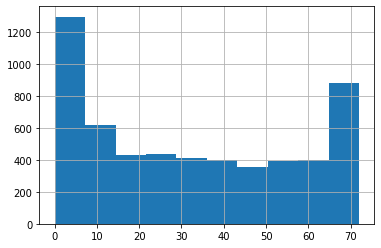

In [0]:
# histogram for tenure
traindrop_1['tenure'].hist()

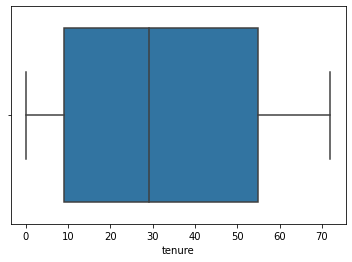

In [0]:
# boxplot for tenure
ax = sns.boxplot(traindrop_1['tenure'])

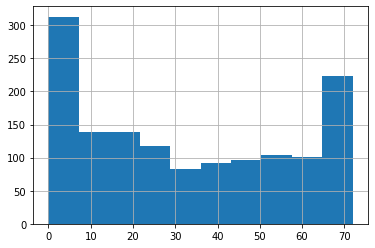

In [0]:
# histogram for tenure
testdrop_1['tenure'].hist()

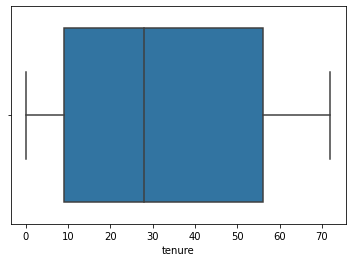

In [0]:
# boxplot for tenure
ax = sns.boxplot(testdrop_1['tenure'])

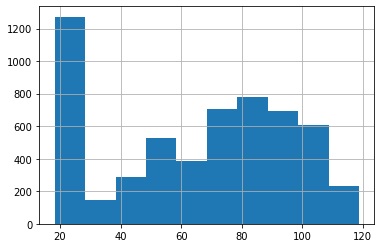

In [0]:
# histogram for MonthlyCharges
traindrop_1['MonthlyCharges'].hist()

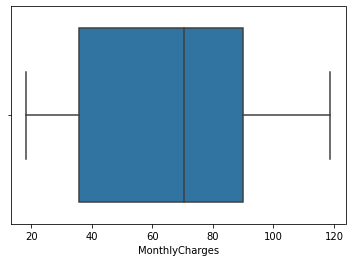

In [0]:
# boxplot for MonthlyCharges
ax = sns.boxplot(traindrop_1['MonthlyCharges'])

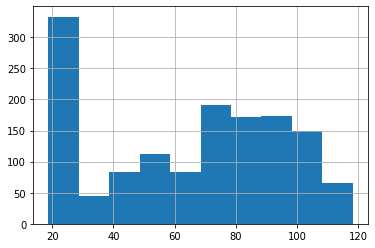

In [0]:
# histogram for MonthlyCharges
testdrop_1['MonthlyCharges'].hist()

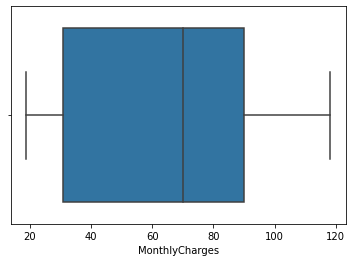

In [0]:
# boxplot for MonthlyCharges
ax = sns.boxplot(testdrop_1['MonthlyCharges'])

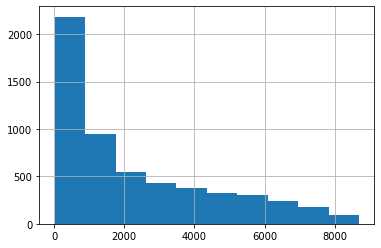

In [0]:
# histogram for TotalCharges
traindrop_1['TotalCharges'].hist()

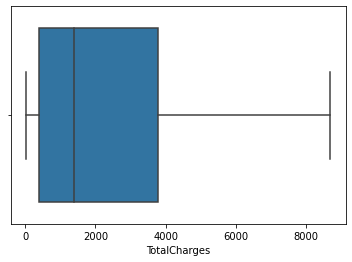

In [0]:
# boxplot for TotalCharges
ax = sns.boxplot(traindrop_1['TotalCharges'])

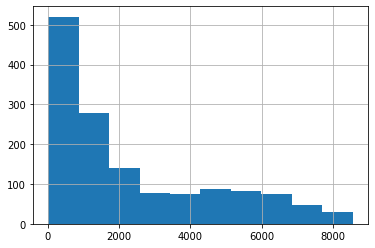

In [0]:
# histogram for TotalCharges
testdrop_1['TotalCharges'].hist()

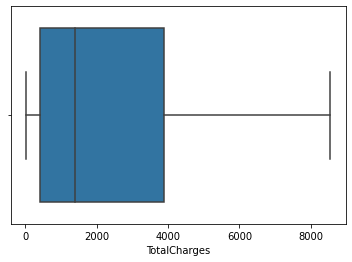

In [0]:
# boxplot for TotalCharges
ax = sns.boxplot(testdrop_1['TotalCharges'])

## Apply min-max normalization

In [0]:
# normalize MonthlyCharges & TotalCharges
# import library 
from sklearn import preprocessing

In [0]:
# Apply min-max normalization on MonthlyCharges & TotalCharges

minmax_scaler = preprocessing.MinMaxScaler().fit(traindrop_1[['MonthlyCharges']])
traindrop_1['MonthlyCharges_minmax']=minmax_scaler.transform(traindrop_1[['MonthlyCharges']])
minmax_scaler = preprocessing.MinMaxScaler().fit(testdrop_1[['MonthlyCharges']])
testdrop_1['MonthlyCharges_minmax']=minmax_scaler.transform(testdrop_1[['MonthlyCharges']])
minmax_scaler = preprocessing.MinMaxScaler().fit(traindrop_1[['TotalCharges']])
traindrop_1['TotalCharges_minmax']=minmax_scaler.transform(traindrop_1[['TotalCharges']])
minmax_scaler = preprocessing.MinMaxScaler().fit(testdrop_1[['TotalCharges']])
testdrop_1['TotalCharges_minmax']=minmax_scaler.transform(testdrop_1[['TotalCharges']])

In [0]:
display('Monthly Charges:','traindrop_1', traindrop_1['MonthlyCharges_minmax'], 'testdrop_1', testdrop_1['MonthlyCharges_minmax'])

'Monthly Charges:'

'traindrop_1'

customerID
0002-ORFBO    0.471144
0003-MKNFE    0.414428
0004-TLHLJ    0.553731
0013-EXCHZ    0.653234
0013-SMEOE    0.909950
                ...   
9986-BONCE    0.026866
9987-LUTYD    0.367164
9992-UJOEL    0.318905
9993-LHIEB    0.493532
9995-HOTOH    0.405473
Name: MonthlyCharges_minmax, Length: 5634, dtype: float64

'testdrop_1'

customerID
0011-IGKFF    0.796781
0013-MHZWF    0.509054
0016-QLJIS    0.720825
0021-IKXGC    0.536217
0031-PVLZI    0.015594
                ...   
9959-WOFKT    0.884306
9961-JBNMK    0.784708
9965-YOKZB    0.654427
9971-ZWPBF    0.906439
9992-RRAMN    0.667002
Name: MonthlyCharges_minmax, Length: 1409, dtype: float64

In [0]:
display('Total Charges:','traindrop_1', traindrop_1['TotalCharges_minmax'], 'testdrop_1', testdrop_1['TotalCharges_minmax'])

'Total Charges:'

'traindrop_1'

customerID
0002-ORFBO    0.066288
0003-MKNFE    0.060415
0004-TLHLJ    0.030233
0013-EXCHZ    0.028681
0013-SMEOE    0.909929
                ...   
9986-BONCE    0.007691
9987-LUTYD    0.083551
9992-UJOEL    0.008528
9993-LHIEB    0.531829
9995-HOTOH    0.425660
Name: TotalCharges_minmax, Length: 5634, dtype: float64

'testdrop_1'

customerID
0011-IGKFF    0.142941
0013-MHZWF    0.064802
0016-QLJIS    0.696395
0021-IKXGC    0.006250
0031-PVLZI    0.006748
                ...   
9959-WOFKT    0.863409
9961-JBNMK    0.235860
9965-YOKZB    0.090445
9971-ZWPBF    0.422872
9992-RRAMN    0.217498
Name: TotalCharges_minmax, Length: 1409, dtype: float64

In [0]:
#sort the y values in place with the training/testing dataset

In [0]:
y_traindrop_1 = y_train_1.sort_values(['customerID'])
y_testdrop_1 = y_test_1.sort_values(['customerID'])

In [0]:
y_train_1.head()

,Churn
customerID,
3164-YAXFY,No
1101-SSWAG,No
3097-NQYSN,Yes
5825-XJOCM,No
9360-OMDZZ,No


In [0]:
# check the updated data frame
display('traindrop_1', traindrop_1.head(), 'y_traindrop_1', y_traindrop_1.head())

'traindrop_1'

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MonthlyCharges_minmax,TotalCharges_minmax
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,9,65.6,593.30,0,1,1,1,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,0,0,1,0,0,1,0.471144,0.066288
0003-MKNFE,0,9,59.9,542.40,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0.414428,0.060415
0004-TLHLJ,0,4,73.9,280.85,1,0,0,1,1,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0.553731,0.030233
0013-EXCHZ,1,3,83.9,267.40,0,1,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1,0.653234,0.028681
0013-SMEOE,1,71,109.7,7904.25,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,0,0.909950,0.909929


'y_traindrop_1'

,Churn
customerID,
0002-ORFBO,No
0003-MKNFE,No
0004-TLHLJ,Yes
0013-EXCHZ,Yes
0013-SMEOE,No


## Cleaned Dataset 2

In [0]:
train_2, test_2,y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state = 20)

In [0]:
y_traindrop_2 = y_train_2.sort_values(['customerID'])
y_testdrop_2 = y_test_2.sort_values(['customerID'])

In [0]:
# view the first 5 lines of the data to have a basic idea
display('train_2', train_2.head(), 'test_2', test_2.head())

'train_2'

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,
5140-FOMCQ,Female,0,Yes,No,59,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),109.15,6557.75
8869-TORSS,Female,0,No,No,48,Yes,No,DSL,Yes,No,Yes,Yes,No,No,One year,Yes,Credit card (automatic),60.35,2896.4
1583-IHQZE,Male,0,No,No,12,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,112.95,1384.75
3957-LXOLK,Female,1,No,No,28,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,106.15,3152.5
2933-FILNV,Female,0,Yes,Yes,2,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,24.40,36.55


'test_2'

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,
6061-PQHMK,Female,0,No,No,25,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.90,527.5
9880-TDQAC,Female,0,Yes,Yes,72,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,60.00,4264
9626-VFRGG,Female,0,No,Yes,41,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),88.50,3645.05
2642-MAWLJ,Female,0,Yes,Yes,36,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.25,717.95
6311-UEUME,Female,0,No,No,29,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,78.90,2384.15


In [0]:
# retrieve information of the datasets
train_2.info()
test_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 5140-FOMCQ to 0661-KBKPA
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5634 non-null   object 
 1   SeniorCitizen     5634 non-null   int64  
 2   Partner           5634 non-null   object 
 3   Dependents        5634 non-null   object 
 4   tenure            5634 non-null   int64  
 5   PhoneService      5634 non-null   object 
 6   MultipleLines     5634 non-null   object 
 7   InternetService   5634 non-null   object 
 8   OnlineSecurity    5634 non-null   object 
 9   OnlineBackup      5634 non-null   object 
 10  DeviceProtection  5634 non-null   object 
 11  TechSupport       5634 non-null   object 
 12  StreamingTV       5634 non-null   object 
 13  StreamingMovies   5634 non-null   object 
 14  Contract          5634 non-null   object 
 15  PaperlessBilling  5634 non-null   object 
 16  PaymentMethod     5634 non-null 

## Change the data type

In [0]:
# to view the information of numerical variables in training and testing set
display('train_2', train_2.describe(), 'test_2', test_2.describe())

'train_2'

,SeniorCitizen,tenure,MonthlyCharges
count,5634.000000,5634.000000,5634.000000
mean,0.161164,32.228612,64.859878
std,0.367715,24.518091,30.112232
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.562500
50%,0.000000,29.000000,70.425000
75%,0.000000,55.000000,90.000000
max,1.000000,72.000000,118.750000


'test_2'

,SeniorCitizen,tenure,MonthlyCharges
count,1409.000000,1409.000000,1409.000000
mean,0.166075,32.941093,64.369092
std,0.372280,24.724822,30.008631
min,0.000000,1.000000,18.800000
25%,0.000000,9.000000,35.000000
50%,0.000000,30.000000,70.100000
75%,0.000000,56.000000,89.300000
max,1.000000,72.000000,117.600000


In [0]:
# Change data type for 'SeniorCitizen' from numeric to categorical
train_2.loc[:, 'SeniorCitizen'] = train_2.loc[:, 'SeniorCitizen'].astype(str)
test_2.loc[:, 'SeniorCitizen'] = test_2.loc[:, 'SeniorCitizen'].astype(str)

In [0]:
# Change data type for 'TotalCharges' from categorical to numeric
train_2.loc[:, 'TotalCharges'] = pd.to_numeric(train_2.loc[:, 'TotalCharges'], errors='coerce')
test_2.loc[:, 'TotalCharges'] = pd.to_numeric(test_2.loc[:, 'TotalCharges'], errors='coerce')

In [0]:
# check if data type is changed correctly
train_2.info()
test_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 5140-FOMCQ to 0661-KBKPA
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5634 non-null   object 
 1   SeniorCitizen     5634 non-null   object 
 2   Partner           5634 non-null   object 
 3   Dependents        5634 non-null   object 
 4   tenure            5634 non-null   int64  
 5   PhoneService      5634 non-null   object 
 6   MultipleLines     5634 non-null   object 
 7   InternetService   5634 non-null   object 
 8   OnlineSecurity    5634 non-null   object 
 9   OnlineBackup      5634 non-null   object 
 10  DeviceProtection  5634 non-null   object 
 11  TechSupport       5634 non-null   object 
 12  StreamingTV       5634 non-null   object 
 13  StreamingMovies   5634 non-null   object 
 14  Contract          5634 non-null   object 
 15  PaperlessBilling  5634 non-null   object 
 16  PaymentMethod     5634 non-null 

## Handle missing values

In [0]:
#Show missing values for 'TotalCharges' 
display('train_2', train_2[train_2['TotalCharges'].isnull()], 'test_2', test_2[test_2['TotalCharges'].isnull()])

'train_2'

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,
2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN
7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN
3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN


'test_2'

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,


In [0]:
#to fill in the missing values in training dataset for "Total charges" by type of internet service
train_2.loc[:, 'TotalCharges'] = train_2.groupby('InternetService').TotalCharges.transform(lambda x: x.fillna(x.mean()))

In [0]:
#find the mean age for different types of internet service in training set
train_2.groupby('InternetService').TotalCharges.mean()

InternetService
DSL            2108.432482
Fiber optic    3212.674478
No              657.549753
Name: TotalCharges, dtype: float64

In [0]:
#fill in the missing values of 'TotalCharges' in testing set by mean in training set
test_2.loc[:, 'TotalCharges'] = test_2['TotalCharges'].fillna(test_2['InternetService'].map({'DSL':2127.912974,'Fiber optic':3194.821521,'No':668.664151}))

In [0]:
#check if all the missing values for age is filled in
train_2.info()
test_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 5140-FOMCQ to 0661-KBKPA
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5634 non-null   object 
 1   SeniorCitizen     5634 non-null   object 
 2   Partner           5634 non-null   object 
 3   Dependents        5634 non-null   object 
 4   tenure            5634 non-null   int64  
 5   PhoneService      5634 non-null   object 
 6   MultipleLines     5634 non-null   object 
 7   InternetService   5634 non-null   object 
 8   OnlineSecurity    5634 non-null   object 
 9   OnlineBackup      5634 non-null   object 
 10  DeviceProtection  5634 non-null   object 
 11  TechSupport       5634 non-null   object 
 12  StreamingTV       5634 non-null   object 
 13  StreamingMovies   5634 non-null   object 
 14  Contract          5634 non-null   object 
 15  PaperlessBilling  5634 non-null   object 
 16  PaymentMethod     5634 non-null 

In [0]:
display('train_2', train_2.describe(), 'test_2', test_2.describe())

'train_2'

,tenure,MonthlyCharges,TotalCharges
count,5634.000000,5634.000000,5634.000000
mean,32.228612,64.859878,2282.027576
std,24.518091,30.112232,2263.926069
min,0.000000,18.250000,18.800000
25%,9.000000,35.562500,398.550000
50%,29.000000,70.425000,1398.975000
75%,55.000000,90.000000,3793.175000
max,72.000000,118.750000,8684.800000


'test_2'

,tenure,MonthlyCharges,TotalCharges
count,1409.000000,1409.000000,1409.000000
mean,32.941093,64.369092,2280.846558
std,24.724822,30.008631,2272.595889
min,1.000000,18.800000,19.000000
25%,9.000000,35.000000,419.700000
50%,30.000000,70.100000,1382.900000
75%,56.000000,89.300000,3772.500000
max,72.000000,117.600000,8594.400000


## One-hot Encoding

In [0]:
#create dummy for all categorical features
genderdummy =pd.get_dummies(train_2['gender'],prefix ='gender')
genderdummy1 =pd.get_dummies(test_2['gender'],prefix ='gender')
Partnerdummy =pd.get_dummies(train_2['Partner'],prefix ='Partner')
Partnerdummy1 =pd.get_dummies(test_2['Partner'],prefix ='Partner')
Dependentsdummy =pd.get_dummies(train_2['Dependents'],prefix ='Dependents')
Dependentsdummy1 =pd.get_dummies(test_2['Dependents'],prefix ='Dependents')
PhoneServicedummy =pd.get_dummies(train_2['PhoneService'],prefix ='PhoneService')
PhoneServicedummy1 =pd.get_dummies(test_2['PhoneService'],prefix ='PhoneService')
MultipleLinesdummy =pd.get_dummies(train_2['MultipleLines'],prefix ='MultipleLines')
MultipleLinesdummy1 =pd.get_dummies(test_2['MultipleLines'],prefix ='MultipleLines')
InternetServicedummy =pd.get_dummies(train_2['InternetService'],prefix ='InternetService')
InternetServicedummy1 =pd.get_dummies(test_2['InternetService'],prefix ='InternetService')
OnlineSecuritydummy =pd.get_dummies(train_2['OnlineSecurity'],prefix ='OnlineSecurity')
OnlineSecuritydummy1 =pd.get_dummies(test_2['OnlineSecurity'],prefix ='OnlineSecurity')
OnlineBackupdummy =pd.get_dummies(train_2['OnlineBackup'],prefix ='OnlineBackup')
OnlineBackupdummy1 =pd.get_dummies(test_2['OnlineBackup'],prefix ='OnlineBackup')
DeviceProtectiondummy =pd.get_dummies(train_2['DeviceProtection'],prefix ='DeviceProtection')
DeviceProtectiondummy1 =pd.get_dummies(test_2['DeviceProtection'],prefix ='DeviceProtection')
TechSupportdummy =pd.get_dummies(train_2['TechSupport'],prefix ='TechSupport')
TechSupportdummy1 =pd.get_dummies(test_2['TechSupport'],prefix ='TechSupport')
StreamingTVdummy =pd.get_dummies(train_2['StreamingTV'],prefix ='StreamingTV')
StreamingTVdummy1 =pd.get_dummies(test_2['StreamingTV'],prefix ='StreamingTV')
StreamingMoviesdummy =pd.get_dummies(train_2['StreamingMovies'],prefix ='StreamingMovies')
StreamingMoviesdummy1 =pd.get_dummies(test_2['StreamingMovies'],prefix ='StreamingMovies')
Contractdummy =pd.get_dummies(train_2['Contract'],prefix ='Contract')
Contractdummy1 =pd.get_dummies(test_2['Contract'],prefix ='Contract')
PaperlessBillingdummy =pd.get_dummies(train_2['PaperlessBilling'],prefix ='PaperlessBilling')
PaperlessBillingdummy1 =pd.get_dummies(test_2['PaperlessBilling'],prefix ='PaperlessBilling')
PaymentMethoddummy =pd.get_dummies(train_2['PaymentMethod'],prefix ='PaymentMethod')
PaymentMethoddummy1 =pd.get_dummies(test_2['PaymentMethod'],prefix ='PaymentMethod')

In [0]:
#add dummy variables to data frame
trainwithdummy_2 = pd.concat([train_2,genderdummy,Partnerdummy,Dependentsdummy,PhoneServicedummy,MultipleLinesdummy,InternetServicedummy,OnlineSecuritydummy,OnlineBackupdummy,DeviceProtectiondummy,TechSupportdummy,StreamingTVdummy,StreamingMoviesdummy,Contractdummy,PaperlessBillingdummy,PaymentMethoddummy],axis=1,sort=True)
testwithdummy_2 = pd.concat([test_2,genderdummy1,Partnerdummy1,Dependentsdummy1,PhoneServicedummy1,MultipleLinesdummy1,InternetServicedummy1,OnlineSecuritydummy1,OnlineBackupdummy1,DeviceProtectiondummy1,TechSupportdummy1,StreamingTVdummy1,StreamingMoviesdummy1,Contractdummy1,PaperlessBillingdummy1,PaymentMethoddummy1],axis=1,sort=True)

In [0]:
#drop meaningless and duplicated deatures
traindrop_2=trainwithdummy_2.drop(columns=['gender','gender_Female','Partner','Partner_No','Dependents','Dependents_No','PhoneService','PhoneService_No','MultipleLines','MultipleLines_No phone service','InternetService','InternetService_No','OnlineSecurity','OnlineSecurity_No internet service','OnlineBackup','OnlineBackup_No internet service','DeviceProtection','DeviceProtection_No internet service','TechSupport','TechSupport_No internet service','StreamingTV','StreamingTV_No internet service','StreamingMovies','StreamingMovies_No internet service','Contract','Contract_One year','PaperlessBilling','PaperlessBilling_No','PaymentMethod','PaymentMethod_Credit card (automatic)'])
testdrop_2=testwithdummy_2.drop(columns=['gender','gender_Female','Partner','Partner_No','Dependents','Dependents_No','PhoneService','PhoneService_No','MultipleLines','MultipleLines_No phone service','InternetService','InternetService_No','OnlineSecurity','OnlineSecurity_No internet service','OnlineBackup','OnlineBackup_No internet service','DeviceProtection','DeviceProtection_No internet service','TechSupport','TechSupport_No internet service','StreamingTV','StreamingTV_No internet service','StreamingMovies','StreamingMovies_No internet service','Contract','Contract_One year','PaperlessBilling','PaperlessBilling_No','PaymentMethod','PaymentMethod_Credit card (automatic)'])

In [0]:
traindrop_2.info()
testdrop_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            5634 non-null   object 
 1   tenure                                   5634 non-null   int64  
 2   MonthlyCharges                           5634 non-null   float64
 3   TotalCharges                             5634 non-null   float64
 4   gender_Male                              5634 non-null   uint8  
 5   Partner_Yes                              5634 non-null   uint8  
 6   Dependents_Yes                           5634 non-null   uint8  
 7   PhoneService_Yes                         5634 non-null   uint8  
 8   MultipleLines_No                         5634 non-null   uint8  
 9   MultipleLines_Yes                        5634 non-null   uint8  
 10  InternetService_DSL                   

In [0]:
display('traindrop_2', traindrop_2.head(),'testdrop_2', testdrop_2.head() )

'traindrop_2'

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,9,65.6,593.30,0,1,1,1,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,0,0,1,0,0,1
0003-MKNFE,0,9,59.9,542.40,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1
0004-TLHLJ,0,4,73.9,280.85,1,0,0,1,1,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0
0011-IGKFF,1,13,98.0,1237.85,1,1,0,1,1,0,0,1,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0,1,0
0013-EXCHZ,1,3,83.9,267.40,0,1,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1


'testdrop_2'

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0017-IUDMW,0,72,116.80,8456.75,0,1,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,0
0018-NYROU,0,5,68.95,351.50,0,1,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
0020-JDNXP,0,34,61.25,1993.20,0,1,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1
0027-KWYKW,0,23,83.75,1849.95,0,1,1,1,0,1,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0
0032-PGELS,0,1,30.50,30.50,0,1,1,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0


## Data Visualization

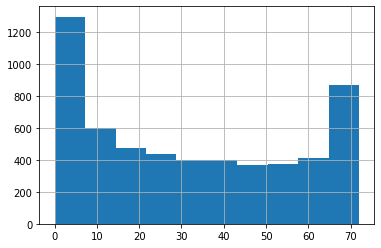

In [0]:
# histogram for tenure (training set)
traindrop_2['tenure'].hist()

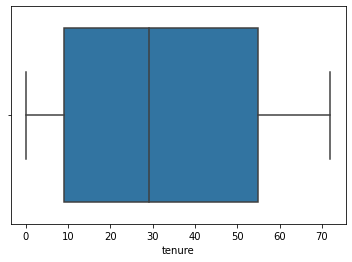

In [0]:
# boxplot for tenure (training set)
ax = sns.boxplot(traindrop_2['tenure'])

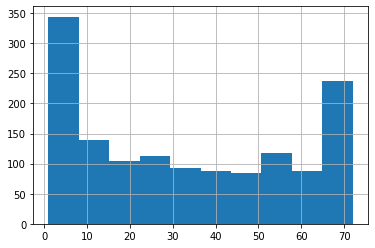

In [0]:
# histogram for tenure (testing set)
testdrop_2['tenure'].hist()

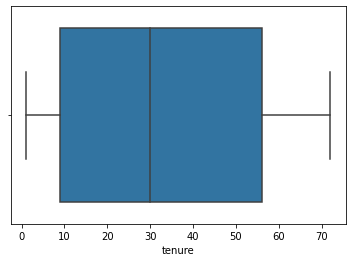

In [0]:
# boxplot for tenure (testing set)
ax = sns.boxplot(testdrop_2['tenure'])

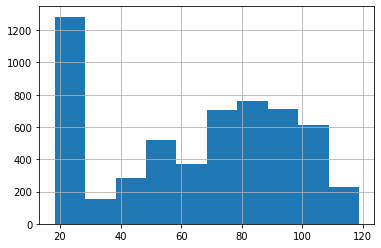

In [0]:
# histogram for MonthlyCharges (training set)
traindrop_2['MonthlyCharges'].hist()

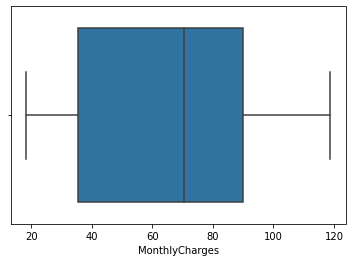

In [0]:
# boxplot for MonthlyCharges (training set)
ax = sns.boxplot(traindrop_2['MonthlyCharges'])

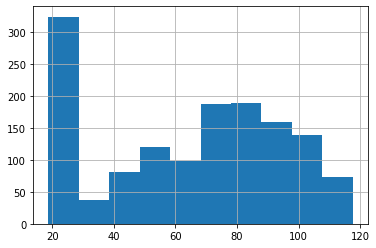

In [0]:
# histogram for MonthlyCharges (testing set)
testdrop_2['MonthlyCharges'].hist()

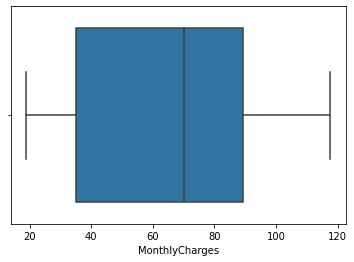

In [0]:
# boxplot for MonthlyCharges (testing set)
ax = sns.boxplot(testdrop_2['MonthlyCharges'])

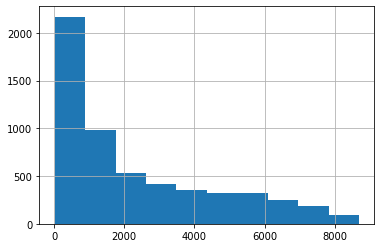

In [0]:
# histogram for TotalCharges (training set)
traindrop_2['TotalCharges'].hist()

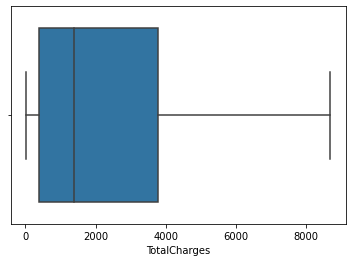

In [0]:
# boxplot for TotalCharges (training set)
ax = sns.boxplot(traindrop_2['TotalCharges'])

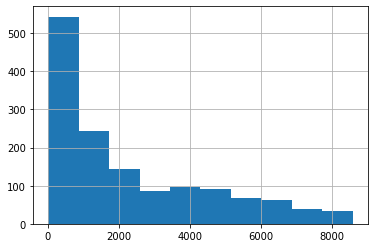

In [0]:
# histogram for TotalCharges (testing set)
testdrop_2['TotalCharges'].hist()

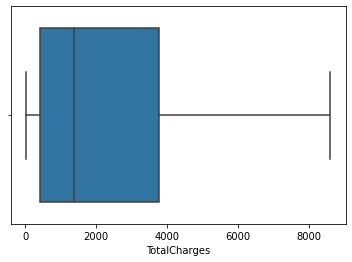

In [0]:
# boxplot for TotalCharges (testing set)
ax = sns.boxplot(testdrop_2['TotalCharges'])

## Apply Z score normalization

In [0]:
#Apply Zscore normalization on a single attribute
zscore_scaler = preprocessing.StandardScaler().fit(traindrop_2[['tenure']])
traindrop_2['tenure_zscore']=zscore_scaler.transform(traindrop_2[['tenure']])
testdrop_2['tenure_zscore']=zscore_scaler.transform(testdrop_2[['tenure']])
zscore_scaler = preprocessing.StandardScaler().fit(traindrop_2[['MonthlyCharges']])
traindrop_2['MonthlyCharges_zscore']=zscore_scaler.transform(traindrop_2[['MonthlyCharges']])
testdrop_2['MonthlyCharges_zscore']=zscore_scaler.transform(testdrop_2[['MonthlyCharges']])
zscore_scaler = preprocessing.StandardScaler().fit(traindrop_2[['TotalCharges']])
traindrop_2['TotalCharges_zscore']=zscore_scaler.transform(traindrop_2[['TotalCharges']])
testdrop_2['TotalCharges_zscore']=zscore_scaler.transform(testdrop_2[['TotalCharges']])

In [0]:
traindrop_2 = traindrop_2.drop(columns=['tenure', 'MonthlyCharges', 'TotalCharges'])
testdrop_2 = testdrop_2.drop(columns=['tenure', 'MonthlyCharges', 'TotalCharges'] )

In [0]:
display('Monthly Charges Z score', 'traindrop_2', 
        traindrop_2['MonthlyCharges_zscore'], 'test_drop_2',testdrop_2['MonthlyCharges_zscore'])

'Monthly Charges Z score'

'traindrop_2'

customerID
0002-ORFBO    0.024581
0003-MKNFE   -0.164728
0004-TLHLJ    0.300241
0011-IGKFF    1.100651
0013-EXCHZ    0.632361
                ...   
9986-BONCE   -1.458337
9987-LUTYD   -0.322485
9992-RRAMN    0.672216
9992-UJOEL   -0.483563
9995-HOTOH   -0.194619
Name: MonthlyCharges_zscore, Length: 5634, dtype: float64

'test_drop_2'

customerID
0017-IUDMW    1.725038
0018-NYROU    0.135841
0020-JDNXP   -0.119891
0027-KWYKW    0.627380
0032-PGELS   -1.141162
                ...   
9933-QRGTX    1.074082
9972-NKTFD   -0.339091
9978-HYCIN    0.667234
9979-RGMZT    0.969464
9993-LHIEB    0.099308
Name: MonthlyCharges_zscore, Length: 1409, dtype: float64

In [0]:
display('Total Charges Z score', 'traindrop_2', 
        traindrop_2['TotalCharges_zscore'], 'test_drop_2',testdrop_2['TotalCharges_zscore'])

'Total Charges Z score'

'traindrop_2'

customerID
0002-ORFBO   -0.745995
0003-MKNFE   -0.768480
0004-TLHLJ   -0.884020
0011-IGKFF   -0.461265
0013-EXCHZ   -0.889961
                ...   
9986-BONCE   -0.970315
9987-LUTYD   -0.679909
9992-RRAMN   -0.180379
9992-UJOEL   -0.967113
9995-HOTOH    0.629746
Name: TotalCharges_zscore, Length: 5634, dtype: float64

'test_drop_2'

customerID
0017-IUDMW    2.727682
0018-NYROU   -0.852810
0020-JDNXP   -0.127590
0027-KWYKW   -0.190870
0032-PGELS   -0.994612
                ...   
9933-QRGTX    1.470904
9972-NKTFD   -0.337730
9978-HYCIN    0.766887
9979-RGMZT   -0.728259
9993-LHIEB    1.036178
Name: TotalCharges_zscore, Length: 1409, dtype: float64

In [0]:
#check the data once again
display('traindrop_2', traindrop_2.head(),'testdrop_2', testdrop_2.head() )

'traindrop_2'

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_zscore,MonthlyCharges_zscore,TotalCharges_zscore
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,0,1,1,1,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,0,0,1,0,0,1,-0.947491,0.024581,-0.745995
0003-MKNFE,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,-0.947491,-0.164728,-0.768480
0004-TLHLJ,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,-1.151440,0.300241,-0.884020
0011-IGKFF,1,1,1,0,1,1,0,0,1,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0,1,0,-0.784332,1.100651,-0.461265
0013-EXCHZ,1,0,1,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1,-1.192230,0.632361,-0.889961


'testdrop_2'

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_zscore,MonthlyCharges_zscore,TotalCharges_zscore
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0017-IUDMW,0,0,1,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,0,1.622268,1.725038,2.727682
0018-NYROU,0,0,1,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,-1.110650,0.135841,-0.852810
0020-JDNXP,0,0,1,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0.072255,-0.119891,-0.127590
0027-KWYKW,0,0,1,1,1,0,1,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,-0.376434,0.627380,-0.190870
0032-PGELS,0,0,1,1,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,-1.273810,-1.141162,-0.994612


## Cleaned Dataset 3

In [0]:
train_3, test_3,y_train_3, y_test_3 = train_test_split(X, y, test_size=0.2, random_state = 30)

In [0]:
y_traindrop_3 = y_train_3.sort_values(['customerID'])
y_testdrop_3 = y_test_3.sort_values(['customerID'])

In [0]:
churn = y_train_3['Churn']
train_3 = train_3.join(churn)

## One hot-encoding on Yes and Nos

In [0]:
#get columns with only 'Yes' and 'No'
to_1_or_0_list = []
for instance in train_3.columns:
    if len(train_3[instance].unique()) == 2:
        print(instance)
        if 'Yes' in list(train_3[instance].unique()):
            to_1_or_0_list.append(instance)
        print (train_3[instance].unique())
print(to_1_or_0_list)

gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['No' 'Yes']
Dependents
['Yes' 'No']
PhoneService
['Yes' 'No']
PaperlessBilling
['No' 'Yes']
Churn
['No' 'Yes']
['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']


In [0]:
#convert all columns with 'Yes' and 'No' to to 1 and 0
for col in to_1_or_0_list:
    train_3[col].replace(to_replace='Yes', value=1, inplace=True)
    train_3[col].replace(to_replace='No',  value=0, inplace=True)
train_3['gender'].replace(to_replace='Male', value=1, inplace=True)
train_3['gender'].replace(to_replace='Female',  value=0, inplace=True)
train_3[to_1_or_0_list + ['SeniorCitizen', 'gender']] = train_3[to_1_or_0_list + ['SeniorCitizen', 'gender']].astype(int)

if 'Churn' in to_1_or_0_list:
    to_1_or_0_list.remove('Churn')

for col in to_1_or_0_list:
    test_3[col].replace(to_replace='Yes', value=1, inplace=True)
    test_3[col].replace(to_replace='No',  value=0, inplace=True)
test_3['gender'].replace(to_replace='Male', value=1, inplace=True)
test_3['gender'].replace(to_replace='Female',  value=0, inplace=True)
test_3[to_1_or_0_list + ['SeniorCitizen', 'gender']] = test_3[to_1_or_0_list + ['SeniorCitizen', 'gender']].astype(int)

In [0]:
#check the new unique instances in each column
for instance in train_3.columns:
    print(instance)
    print (train_3[instance].unique())

gender
[0 1]
SeniorCitizen
[0 1]
Partner
[0 1]
Dependents
[1 0]
tenure
[25 57 70 12 24 18 53  8  1 63  3 40 72 11 71 62  5  2 35 45 34 44 17 23
 39 58  0  4 22 60 69  7 67 42 43 54 29 36 14 15 49 26 50 30 31  6 32 66
 56 38 13 19 21 46 10 28 52 16  9 48 65 20 59 68 47 64 51 37 27 55 61 33
 41]
PhoneService
[1 0]
MultipleLines
['No' 'Yes' 'No phone service']
InternetService
['No' 'Fiber optic' 'DSL']
OnlineSecurity
['No internet service' 'No' 'Yes']
OnlineBackup
['No internet service' 'No' 'Yes']
DeviceProtection
['No internet service' 'Yes' 'No']
TechSupport
['No internet service' 'No' 'Yes']
StreamingTV
['No internet service' 'Yes' 'No']
StreamingMovies
['No internet service' 'Yes' 'No']
Contract
['Month-to-month' 'Two year' 'One year']
PaperlessBilling
[0 1]
PaymentMethod
['Credit card (automatic)' 'Electronic check' 'Mailed check'
 'Bank transfer (automatic)']
MonthlyCharges
[20.05 95.25 69.2  ... 42.1  23.5  34.85]
TotalCharges
['471.7' '5464.65' '4872.35' ... '212.4' '1131.2' '141

In [0]:
## Change the datatype

In [0]:
#train_3['SeniorCitizen'] = train_3['SeniorCitizen'].astype(str)
#test_3['SeniorCitizen'] = test_3['SeniorCitizen'].astype(str)

In [0]:
train_3.loc[:, 'TotalCharges'] = pd.to_numeric(train_3.loc[:, 'TotalCharges'], errors='coerce')
test_3.loc[:, 'TotalCharges'] = pd.to_numeric(test_3.loc[:, 'TotalCharges'], errors='coerce')

## Handle missing values

In [0]:
#check for null values
train_3.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        9
Churn               0
dtype: int64

In [0]:
test_3.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        2
dtype: int64

In [0]:
#to fill in the missing values in training dataset for "Total charges" by type of internet service
train_3.loc[:, 'TotalCharges'] = train_3.groupby('InternetService').TotalCharges.transform(lambda x: x.fillna(x.mean()))

In [0]:
#find the mean age for different types of internet service in training set
train_3.groupby('InternetService').TotalCharges.mean()

InternetService
DSL            2104.864799
Fiber optic    3201.726507
No              657.025640
Name: TotalCharges, dtype: float64

In [0]:
#to fill in the missing values in training dataset for "Total charges" by type of internet service
test_3.loc[:, 'TotalCharges'] = test_3.groupby('InternetService').TotalCharges.transform(lambda x: x.fillna(x.mean()))

In [0]:
#find the mean age for different types of internet service in training set
test_3.groupby('InternetService').TotalCharges.mean()

InternetService
DSL            2177.415091
Fiber optic    3219.035391
No              703.158704
Name: TotalCharges, dtype: float64

## Apply Z score normalization

In [0]:
from sklearn import preprocessing
#convert to numeric
train_3['TotalCharges'] = pd.to_numeric(train_3['TotalCharges'], errors='coerce')
test_3['TotalCharges'] = pd.to_numeric(test_3['TotalCharges'], errors='coerce')
#normalize
for normalize_col in ['tenure','MonthlyCharges', 'TotalCharges']:
    zscore_scaler = preprocessing.StandardScaler().fit(train_3[[normalize_col]])
    train_3[normalize_col]=zscore_scaler.transform(train_3[[normalize_col]])
    test_3[normalize_col]=zscore_scaler.transform(test_3[[normalize_col]])
#rename normalized columns
train_3.rename(columns={'tenure':'tenure_normalize','MonthlyCharges' :'MonthlyCharges_normalize', 'TotalCharges':'TotalCharges_normalize'}, inplace=True)
test_3.rename(columns={'tenure':'tenure_normalize','MonthlyCharges' :'MonthlyCharges_normalize', 'TotalCharges':'TotalCharges_normalize'}, inplace=True)
#check the attirbutes
for instance in train_3.columns:
    print(instance)
    print (train_3[instance].unique())

gender
[0 1]
SeniorCitizen
[0 1]
Partner
[0 1]
Dependents
[1 0]
tenure_normalize
[-0.29351889  1.01151782  1.54168898 -0.82369005 -0.33430129 -0.57899567
  0.84838823 -0.98681964 -1.27229642  1.2562122  -1.19073163  0.31821707
  1.62325378 -0.86447245  1.58247138  1.2154298  -1.10916683 -1.23151402
  0.11430508  0.52212905  0.07352269  0.48134666 -0.61977807 -0.37508368
  0.27743467  1.05230022 -1.31307882 -1.14994923 -0.41586608  1.13386501
  1.50090658 -1.02760204  1.41934179  0.39978186  0.44056426  0.88917063
 -0.1303893   0.15508748 -0.74212526 -0.70134286  0.68525864 -0.25273649
  0.72604104 -0.0896069  -0.04882451 -1.06838443 -0.00804211  1.37855939
  0.97073542  0.23665227 -0.78290765 -0.53821327 -0.45664848  0.56291145
 -0.90525485 -0.1711717   0.80760583 -0.66056046 -0.94603724  0.64447624
  1.337777   -0.49743087  1.09308261  1.46012419  0.60369385  1.2969946
  0.76682344  0.19586988 -0.21195409  0.92995302  1.17464741  0.03274029
  0.35899946]
PhoneService
[1 0]
MultipleLin

## Drop Meaningless Column

In [0]:
corr_train_3 = train_3.corr()

In [0]:
display(corr_train_3)

,gender,SeniorCitizen,Partner,Dependents,tenure_normalize,PhoneService,PaperlessBilling,MonthlyCharges_normalize,TotalCharges_normalize,Churn
gender,1.000000,0.002801,0.008452,0.005606,-0.000264,-0.001401,-0.002363,-0.020641,-0.006339,-0.004396
SeniorCitizen,0.002801,1.000000,0.010613,-0.212642,0.019703,-0.005788,0.157305,0.219404,0.105615,0.159660
Partner,0.008452,0.010613,1.000000,0.457452,0.379089,0.016484,-0.019237,0.096616,0.317670,-0.142811
Dependents,0.005606,-0.212642,0.457452,1.000000,0.160163,-0.004537,-0.110748,-0.122334,0.059486,-0.160368
tenure_normalize,-0.000264,0.019703,0.379089,0.160163,1.000000,0.007016,0.007854,0.251817,0.824399,-0.348422
PhoneService,-0.001401,-0.005788,0.016484,-0.004537,0.007016,1.000000,0.011857,0.242674,0.109540,0.013807
PaperlessBilling,-0.002363,0.157305,-0.019237,-0.110748,0.007854,0.011857,1.000000,0.360121,0.163555,0.186618
MonthlyCharges_normalize,-0.020641,0.219404,0.096616,-0.122334,0.251817,0.242674,0.360121,1.000000,0.653788,0.195612
TotalCharges_normalize,-0.006339,0.105615,0.317670,0.059486,0.824399,0.109540,0.163555,0.653788,1.000000,-0.196307
Churn,-0.004396,0.159660,-0.142811,-0.160368,-0.348422,0.013807,0.186618,0.195612,-0.196307,1.000000


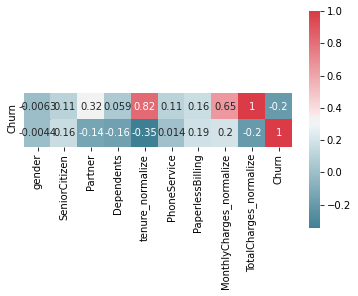

In [0]:
sns.heatmap(corr_train_3.iloc[8:,:], xticklabels=corr_train_3.columns.values, yticklabels=['Churn'], cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, square=True,)

In [0]:
#drop attributes PhoneService
train_3.drop(columns = ['PhoneService'], inplace = True)
test_3.drop(columns = ['PhoneService'], inplace = True)

In [0]:
train_3.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure_normalize',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges_normalize', 'TotalCharges_normalize', 'Churn'],
      dtype='object')

In [0]:
for instance in train_3.columns:
    print(instance)
    print (train_3[instance].unique())

gender
[0 1]
SeniorCitizen
[0 1]
Partner
[0 1]
Dependents
[1 0]
tenure_normalize
[-0.29351889  1.01151782  1.54168898 -0.82369005 -0.33430129 -0.57899567
  0.84838823 -0.98681964 -1.27229642  1.2562122  -1.19073163  0.31821707
  1.62325378 -0.86447245  1.58247138  1.2154298  -1.10916683 -1.23151402
  0.11430508  0.52212905  0.07352269  0.48134666 -0.61977807 -0.37508368
  0.27743467  1.05230022 -1.31307882 -1.14994923 -0.41586608  1.13386501
  1.50090658 -1.02760204  1.41934179  0.39978186  0.44056426  0.88917063
 -0.1303893   0.15508748 -0.74212526 -0.70134286  0.68525864 -0.25273649
  0.72604104 -0.0896069  -0.04882451 -1.06838443 -0.00804211  1.37855939
  0.97073542  0.23665227 -0.78290765 -0.53821327 -0.45664848  0.56291145
 -0.90525485 -0.1711717   0.80760583 -0.66056046 -0.94603724  0.64447624
  1.337777   -0.49743087  1.09308261  1.46012419  0.60369385  1.2969946
  0.76682344  0.19586988 -0.21195409  0.92995302  1.17464741  0.03274029
  0.35899946]
MultipleLines
['No' 'Yes' 'No 

## One hot-encoding

In [0]:
#create dummy for all categorical features
MultipleLinesdummy =pd.get_dummies(train_3['MultipleLines'],prefix ='MultipleLines')
MultipleLinesdummy1 =pd.get_dummies(test_3['MultipleLines'],prefix ='MultipleLines')
InternetServicedummy =pd.get_dummies(train_3['InternetService'],prefix ='InternetService')
InternetServicedummy1 =pd.get_dummies(test_3['InternetService'],prefix ='InternetService')
OnlineSecuritydummy =pd.get_dummies(train_3['OnlineSecurity'],prefix ='OnlineSecurity')
OnlineSecuritydummy1 =pd.get_dummies(test_3['OnlineSecurity'],prefix ='OnlineSecurity')
OnlineBackupdummy =pd.get_dummies(train_3['OnlineBackup'],prefix ='OnlineBackup')
OnlineBackupdummy1 =pd.get_dummies(test_3['OnlineBackup'],prefix ='OnlineBackup')
DeviceProtectiondummy =pd.get_dummies(train_3['DeviceProtection'],prefix ='DeviceProtection')
DeviceProtectiondummy1 =pd.get_dummies(test_3['DeviceProtection'],prefix ='DeviceProtection')
TechSupportdummy =pd.get_dummies(train_3['TechSupport'],prefix ='TechSupport')
TechSupportdummy1 =pd.get_dummies(test_3['TechSupport'],prefix ='TechSupport')
StreamingTVdummy =pd.get_dummies(train_3['StreamingTV'],prefix ='StreamingTV')
StreamingTVdummy1 =pd.get_dummies(test_3['StreamingTV'],prefix ='StreamingTV')
StreamingMoviesdummy =pd.get_dummies(train_3['StreamingMovies'],prefix ='StreamingMovies')
StreamingMoviesdummy1 =pd.get_dummies(test_3['StreamingMovies'],prefix ='StreamingMovies')
Contractdummy =pd.get_dummies(train_3['Contract'],prefix ='Contract')
Contractdummy1 =pd.get_dummies(test_3['Contract'],prefix ='Contract')
PaymentMethoddummy =pd.get_dummies(train_3['PaymentMethod'],prefix ='PaymentMethod')
PaymentMethoddummy1 =pd.get_dummies(test_3['PaymentMethod'],prefix ='PaymentMethod')

In [0]:
#add dummy variables to data frame
trainwithdummy_3 = pd.concat([train_3, MultipleLinesdummy,InternetServicedummy,OnlineSecuritydummy,OnlineBackupdummy,DeviceProtectiondummy,TechSupportdummy,StreamingTVdummy,StreamingMoviesdummy,Contractdummy,PaymentMethoddummy],axis=1,sort=True)
testwithdummy_3 = pd.concat([test_3,MultipleLinesdummy1,InternetServicedummy1,OnlineSecuritydummy1,OnlineBackupdummy1,DeviceProtectiondummy1,TechSupportdummy1,StreamingTVdummy1,StreamingMoviesdummy1,Contractdummy1,PaymentMethoddummy1],axis=1,sort=True)

In [0]:
#drop meaningless and duplicated deatures
traindrop_3=trainwithdummy_3.drop(columns=['MultipleLines','MultipleLines_No phone service','InternetService','InternetService_No','OnlineSecurity','OnlineSecurity_No internet service','OnlineBackup','OnlineBackup_No internet service','DeviceProtection','DeviceProtection_No internet service','TechSupport','TechSupport_No internet service','StreamingTV','StreamingTV_No internet service','StreamingMovies','StreamingMovies_No internet service','Contract','Contract_One year','PaymentMethod','PaymentMethod_Credit card (automatic)'])
testdrop_3=testwithdummy_3.drop(columns=['MultipleLines','MultipleLines_No phone service','InternetService','InternetService_No','OnlineSecurity','OnlineSecurity_No internet service','OnlineBackup','OnlineBackup_No internet service','DeviceProtection','DeviceProtection_No internet service','TechSupport','TechSupport_No internet service','StreamingTV','StreamingTV_No internet service','StreamingMovies','StreamingMovies_No internet service','Contract','Contract_One year','PaymentMethod','PaymentMethod_Credit card (automatic)'])

In [0]:
for instance in traindrop_3.columns:
    print(instance)
    print (traindrop_3[instance].unique())

gender
[1 0]
SeniorCitizen
[0 1]
Partner
[0 1]
Dependents
[0 1]
tenure_normalize
[-0.94603724 -1.14994923 -0.78290765 -1.19073163  1.58247138  1.2562122
 -1.02760204  1.337777    0.88917063  1.62325378 -1.10916683  0.97073542
  0.07352269 -1.27229642  0.52212905  0.72604104 -0.25273649  1.50090658
  0.19586988  0.68525864  1.37855939  0.44056426  0.92995302  1.09308261
 -1.23151402 -0.21195409 -0.29351889 -0.1303893  -0.74212526  0.11430508
  1.2969946   0.27743467  0.31821707 -0.86447245 -1.06838443  1.54168898
  1.01151782 -0.66056046  0.03274029 -0.45664848  1.17464741 -0.70134286
  0.48134666 -0.82369005 -0.41586608 -0.33430129 -0.53821327  0.60369385
  1.2154298  -0.0896069   1.05230022 -0.90525485  0.80760583 -0.98681964
  0.64447624  0.56291145  1.41934179 -0.1711717  -0.00804211 -0.37508368
  0.35899946  0.84838823  1.46012419  1.13386501 -0.04882451 -0.61977807
  0.15508748 -0.49743087  0.76682344 -0.57899567  0.23665227  0.39978186
 -1.31307882]
PaperlessBilling
[0 1]
Monthly

## BenchMark Model (Dataset 1)

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [0]:
X_1 = traindrop_1
y_1 = y_traindrop_1.loc[:,'Churn'].map({'Yes': 1, 'No': 0})
X_test_1 = testdrop_1
y_test_1 = y_testdrop_1.loc[:,'Churn'].map({'Yes': 1, 'No': 0})
y_test_1

customerID
0011-IGKFF    1
0013-MHZWF    0
0016-QLJIS    0
0021-IKXGC    0
0031-PVLZI    1
             ..
9959-WOFKT    0
9961-JBNMK    1
9965-YOKZB    1
9971-ZWPBF    0
9992-RRAMN    1
Name: Churn, Length: 1409, dtype: int64

In [0]:
# Do majority-class prediction (not accept: 0)
pred_val_maj = np.zeros((5634,),dtype=int)
pred_val_maj

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
print("Accuracy of Benchmark Model:","\n", accuracy_score(y_1, pred_val_maj, normalize=True, sample_weight=None))

Accuracy of Benchmark Model: 
 0.729144479943202


In [0]:
print("Confusion Matrix of Benchmark Model:", "\n", confusion_matrix(y_1, pred_val_maj))

Confusion Matrix of Benchmark Model: 
 [[4108    0]
 [1526    0]]


In [0]:
print("Classification Report of Benchmark Model:", "\n", classification_report(y_1, pred_val_maj))

Classification Report of Benchmark Model: 
               precision    recall  f1-score   support

           0       0.73      1.00      0.84      4108
           1       0.00      0.00      0.00      1526

    accuracy                           0.73      5634
   macro avg       0.36      0.50      0.42      5634
weighted avg       0.53      0.73      0.61      5634



In [0]:
pred_val_maj_test = np.zeros((1409,),dtype=int)

In [0]:
print("Accuracy of Benchmark Model:","\n", accuracy_score(y_test_1, pred_val_maj_test, normalize=True, sample_weight=None))

Accuracy of Benchmark Model: 
 0.7565649396735273


## BenchMark Model (Dataset 2)

In [0]:
X_2 = traindrop_2
y_2 = y_traindrop_2.loc[:,'Churn'].map({'Yes': 1, 'No': 0})
X_test_2 = testdrop_2
y_test_2 = y_testdrop_2.loc[:,'Churn'].map({'Yes': 1, 'No': 0})
y_test_2

customerID
0017-IUDMW    0
0018-NYROU    0
0020-JDNXP    0
0027-KWYKW    0
0032-PGELS    1
             ..
9933-QRGTX    0
9972-NKTFD    0
9978-HYCIN    0
9979-RGMZT    0
9993-LHIEB    0
Name: Churn, Length: 1409, dtype: int64

In [0]:
# Do majority-class prediction (not accept: 0)
pred_val_maj = np.zeros((5634,),dtype=int)
pred_val_maj

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
print("Accuracy of Benchmark Model:","\n", accuracy_score(y_2, pred_val_maj, normalize=True, sample_weight=None))

Accuracy of Benchmark Model: 
 0.7296769613063543


In [0]:
print("Confusion Matrix of Benchmark Model:", "\n", confusion_matrix(y_2, pred_val_maj))

Confusion Matrix of Benchmark Model: 
 [[4111    0]
 [1523    0]]


In [0]:
print("Classification Report of Benchmark Model:", "\n", classification_report(y_2, pred_val_maj))

Classification Report of Benchmark Model: 
               precision    recall  f1-score   support

           0       0.73      1.00      0.84      4111
           1       0.00      0.00      0.00      1523

    accuracy                           0.73      5634
   macro avg       0.36      0.50      0.42      5634
weighted avg       0.53      0.73      0.62      5634



In [0]:
pred_val_maj_test = np.zeros((1409,),dtype=int)

In [0]:
print("Accuracy of Benchmark Model:","\n", accuracy_score(y_test_2, pred_val_maj_test, normalize=True, sample_weight=None))

Accuracy of Benchmark Model: 
 0.7544357700496807


## BenchMark Model (Dataset 3)



In [0]:
X_3= traindrop_3.drop(['Churn'], axis = 1)
y_3 = y_traindrop_3.loc[:,'Churn'].map({'Yes': 1, 'No': 0})
X_test_3 = testdrop_3
y_test_3 = y_testdrop_3.loc[:,'Churn'].map({'Yes': 1, 'No': 0})

In [0]:
# Do majority-class prediction (not accept: 0)
pred_val_maj = np.zeros((5634,),dtype=int)
pred_val_maj

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
print("Accuracy of Benchmark Model:","\n", accuracy_score(y_3, pred_val_maj, normalize=True, sample_weight=None))

Accuracy of Benchmark Model: 
 0.740681576144835


In [0]:
print("Confusion Matrix of Benchmark Model:", "\n", confusion_matrix(y_3, pred_val_maj))

Confusion Matrix of Benchmark Model: 
 [[4173    0]
 [1461    0]]


In [0]:
print("Classification Report of Benchmark Model:", "\n", classification_report(y_3, pred_val_maj))

Classification Report of Benchmark Model: 
               precision    recall  f1-score   support

           0       0.74      1.00      0.85      4173
           1       0.00      0.00      0.00      1461

    accuracy                           0.74      5634
   macro avg       0.37      0.50      0.43      5634
weighted avg       0.55      0.74      0.63      5634



In [0]:
pred_val_maj_test = np.zeros((1409,),dtype=int)

In [0]:
print("Accuracy of Benchmark Model:","\n", accuracy_score(y_test_3, pred_val_maj_test, normalize=True, sample_weight=None))

Accuracy of Benchmark Model: 
 0.7104329311568488


## Gaussian Naive Bayes Model (Dataset 1)

In [0]:
for instance in X_1.columns:
    print(instance)
    print (X_1[instance].unique())

SeniorCitizen
['0' '1']
tenure
[ 9  4  3 71 63  7 54 72  5 56 34 45  1 50 13 23 55 26 37 49 20 43 59 12
 27  2 25 29 14 35 64 39 40 11  6 30 70 58 16 69 32 33 10 21 15 44 66 22
 24 19 47 46 52  8 60 48 67 28 41 61 68 31 36 17 18 65 62 53 57 38 51 42
  0]
MonthlyCharges
[65.6  59.9  73.9  ... 68.8  18.9  67.85]
TotalCharges
[ 593.3   542.4   280.85 ...   92.75 4627.65 3707.6 ]
gender_Male
[0 1]
Partner_Yes
[1 0]
Dependents_Yes
[1 0]
PhoneService_Yes
[1 0]
MultipleLines_No
[1 0]
MultipleLines_Yes
[0 1]
InternetService_DSL
[1 0]
InternetService_Fiber optic
[0 1]
OnlineSecurity_No
[1 0]
OnlineSecurity_Yes
[0 1]
OnlineBackup_No
[0 1]
OnlineBackup_Yes
[1 0]
DeviceProtection_No
[1 0]
DeviceProtection_Yes
[0 1]
TechSupport_No
[0 1]
TechSupport_Yes
[1 0]
StreamingTV_No
[0 1]
StreamingTV_Yes
[1 0]
StreamingMovies_No
[1 0]
StreamingMovies_Yes
[0 1]
Contract_Month-to-month
[0 1]
Contract_Two year
[0 1]
PaperlessBilling_Yes
[1 0]
PaymentMethod_Bank transfer (automatic)
[0 1]
PaymentMethod_Electroni

In [0]:
#convert str to int
X_1.loc[:,'SeniorCitizen'] = X_1.loc[:,'SeniorCitizen'].map({'1': 1, '0': 0})
X_test_1.loc[:,'SeniorCitizen'] = X_test_1.loc[:,'SeniorCitizen'].map({'1': 1, '0': 0})

In [0]:
for instance in X_1.columns:
    print(instance)
    print (X_1[instance].unique())

SeniorCitizen
[0 1]
tenure
[ 9  4  3 71 63  7 54 72  5 56 34 45  1 50 13 23 55 26 37 49 20 43 59 12
 27  2 25 29 14 35 64 39 40 11  6 30 70 58 16 69 32 33 10 21 15 44 66 22
 24 19 47 46 52  8 60 48 67 28 41 61 68 31 36 17 18 65 62 53 57 38 51 42
  0]
MonthlyCharges
[65.6  59.9  73.9  ... 68.8  18.9  67.85]
TotalCharges
[ 593.3   542.4   280.85 ...   92.75 4627.65 3707.6 ]
gender_Male
[0 1]
Partner_Yes
[1 0]
Dependents_Yes
[1 0]
PhoneService_Yes
[1 0]
MultipleLines_No
[1 0]
MultipleLines_Yes
[0 1]
InternetService_DSL
[1 0]
InternetService_Fiber optic
[0 1]
OnlineSecurity_No
[1 0]
OnlineSecurity_Yes
[0 1]
OnlineBackup_No
[0 1]
OnlineBackup_Yes
[1 0]
DeviceProtection_No
[1 0]
DeviceProtection_Yes
[0 1]
TechSupport_No
[0 1]
TechSupport_Yes
[1 0]
StreamingTV_No
[0 1]
StreamingTV_Yes
[1 0]
StreamingMovies_No
[1 0]
StreamingMovies_Yes
[0 1]
Contract_Month-to-month
[0 1]
Contract_Two year
[0 1]
PaperlessBilling_Yes
[1 0]
PaymentMethod_Bank transfer (automatic)
[0 1]
PaymentMethod_Electronic ch

In [0]:
# import cross validation
from sklearn.model_selection import cross_val_predict, cross_val_score

In [0]:
#Import Gaussian Naive Bayes model from sklearn
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Naive Bayes Classifier
gnb_1 = GaussianNB()

In [0]:
pred_y = cross_val_predict(gnb_1,X_1,y_1,cv=10)
pred_y

array([0, 1, 1, ..., 1, 0, 0])

In [0]:
score = cross_val_score(gnb_1,X_1,y_1,cv=10)
score.mean()

0.7502755627779247

In [0]:
# print the accurary rate
print("Accuracy of Naive Bayes Model:","\n", accuracy_score(y_1, pred_y, normalize=True, sample_weight=None))

Accuracy of Naive Bayes Model: 
 0.7502662406815761


In [0]:
# print the confusion matrix
print("Confusion Matrix of Naive Bayes Model:", "\n", confusion_matrix(y_1, pred_y))

Confusion Matrix of Naive Bayes Model: 
 [[3044 1064]
 [ 343 1183]]


In [0]:
# print the classification report with precision, recall
print("Classification Report of Naive Bayes Model:","\n",classification_report(y_1, pred_y))

Classification Report of Naive Bayes Model: 
               precision    recall  f1-score   support

           0       0.90      0.74      0.81      4108
           1       0.53      0.78      0.63      1526

    accuracy                           0.75      5634
   macro avg       0.71      0.76      0.72      5634
weighted avg       0.80      0.75      0.76      5634



In [0]:
prob = cross_val_predict(gnb_1,X_1,y_1,cv=10, method = 'predict_proba')
prob

array([[9.98132424e-01, 1.86757620e-03],
       [1.35096025e-02, 9.86490398e-01],
       [6.31855861e-05, 9.99936814e-01],
       ...,
       [3.52251017e-02, 9.64774898e-01],
       [1.00000000e+00, 5.17116379e-13],
       [1.00000000e+00, 4.12248843e-11]])

In [0]:
prob[:,1]

array([1.86757620e-03, 9.86490398e-01, 9.99936814e-01, ...,
       9.64774898e-01, 5.17116379e-13, 4.12248843e-11])

In [0]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

In [0]:
# y is the true label, pred_prob[:,1] measures the predicted probability of belonging to class 1 (which is defined as positive class)
fpr, tpr, thresholds = roc_curve(y_1, prob[:,1], pos_label=1)

In [0]:
roc_auc=auc(fpr,tpr)
roc_auc

0.8298112655547913

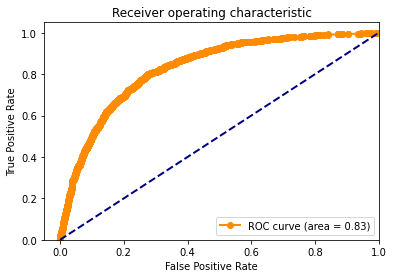

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
lw = 2
plt.plot(fpr, tpr, marker='o',color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [0]:
gnb_1.fit(X_1, y_1)

GaussianNB(priors=None, var_smoothing=1e-09)

## Predict Testing data

In [0]:
pred_val_test = gnb_1.predict(X_test_1)

In [0]:
print("Accuracy from testing data: ", accuracy_score(y_test_1, pred_val_test, normalize = True, sample_weight = None))
print(confusion_matrix(y_test_1, pred_val_test))
print("Classification Report of Naive Bayes Model:","\n",classification_report(y_test_1, pred_val_test))

Accuracy from testing data:  0.7402413058907026
[[787 279]
 [ 87 256]]
Classification Report of Naive Bayes Model: 
               precision    recall  f1-score   support

           0       0.90      0.74      0.81      1066
           1       0.48      0.75      0.58       343

    accuracy                           0.74      1409
   macro avg       0.69      0.74      0.70      1409
weighted avg       0.80      0.74      0.76      1409



## Gaussian Naive Bayes Model (Dataset 2)

In [0]:
X_2.loc[:,'SeniorCitizen'] = X_2.loc[:,'SeniorCitizen'].map({'1': 1, '0': 0})
X_test_2.loc[:,'SeniorCitizen'] = X_test_2.loc[:,'SeniorCitizen'].map({'1': 1, '0': 0})

In [0]:
gnb_2 = GaussianNB()

In [0]:
pred_y = cross_val_predict(gnb_2,X_2,y_2,cv=10)
pred_y

array([0, 1, 1, ..., 1, 1, 0])

In [0]:
score = cross_val_score(gnb_2,X_2,y_2,cv=10)
score.mean()

0.7442399506191502

In [0]:
print("Accuracy of Naive Bayes Model:","\n", accuracy_score(y_2, pred_y, normalize=True, sample_weight=None))

Accuracy of Naive Bayes Model: 
 0.7442314518991835


In [0]:
print("Confusion Matrix of Naive Bayes Model:", "\n", confusion_matrix(y_2, pred_y))

Confusion Matrix of Naive Bayes Model: 
 [[3019 1092]
 [ 349 1174]]


In [0]:
print("Classification Report of Naive Bayes Model:","\n",classification_report(y_2, pred_y))

Classification Report of Naive Bayes Model: 
               precision    recall  f1-score   support

           0       0.90      0.73      0.81      4111
           1       0.52      0.77      0.62      1523

    accuracy                           0.74      5634
   macro avg       0.71      0.75      0.71      5634
weighted avg       0.79      0.74      0.76      5634



In [0]:
prob = cross_val_predict(gnb_2,X_2,y_2,cv=10, method = 'predict_proba')
prob

array([[9.98782984e-01, 1.21701602e-03],
       [2.36371373e-02, 9.76362863e-01],
       [1.51787439e-04, 9.99848213e-01],
       ...,
       [1.13620076e-04, 9.99886380e-01],
       [4.91111883e-02, 9.50888812e-01],
       [1.00000000e+00, 1.22101456e-13]])

In [0]:
prob[:,1]

array([1.21701602e-03, 9.76362863e-01, 9.99848213e-01, ...,
       9.99886380e-01, 9.50888812e-01, 1.22101456e-13])

In [0]:
fpr, tpr, thresholds = roc_curve(y_2, prob[:,1], pos_label=1)

In [0]:
roc_auc=auc(fpr,tpr)
roc_auc

0.8258923858335012

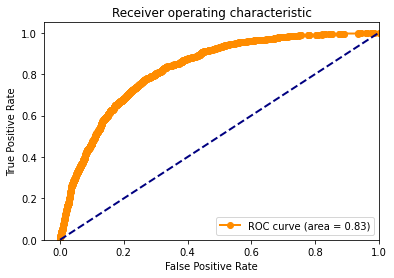

In [0]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, marker='o',color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [0]:
gnb_2.fit(X_2, y_2)

GaussianNB(priors=None, var_smoothing=1e-09)

## Predict Testing data

In [0]:
pred_val_test = gnb_2.predict(X_test_2)

In [0]:
print("Accuracy from testing data: ", accuracy_score(y_test_2, pred_val_test, normalize = True, sample_weight = None))
print(confusion_matrix(y_test_2, pred_val_test))
print("Classification Report of Naive Bayes Model:","\n",classification_report(y_test_2, pred_val_test))

Accuracy from testing data:  0.7501774308019872
[[777 286]
 [ 66 280]]
Classification Report of Naive Bayes Model: 
               precision    recall  f1-score   support

           0       0.92      0.73      0.82      1063
           1       0.49      0.81      0.61       346

    accuracy                           0.75      1409
   macro avg       0.71      0.77      0.71      1409
weighted avg       0.82      0.75      0.77      1409



## Gaussian Naive Bayes Model (Dataset 3)

In [0]:
for instance in X_3.columns:
    print(instance)
    print (X_3[instance].unique())

gender
[1 0]
SeniorCitizen
[0 1]
Partner
[0 1]
Dependents
[0 1]
tenure_normalize
[-0.94603724 -1.14994923 -0.78290765 -1.19073163  1.58247138  1.2562122
 -1.02760204  1.337777    0.88917063  1.62325378 -1.10916683  0.97073542
  0.07352269 -1.27229642  0.52212905  0.72604104 -0.25273649  1.50090658
  0.19586988  0.68525864  1.37855939  0.44056426  0.92995302  1.09308261
 -1.23151402 -0.21195409 -0.29351889 -0.1303893  -0.74212526  0.11430508
  1.2969946   0.27743467  0.31821707 -0.86447245 -1.06838443  1.54168898
  1.01151782 -0.66056046  0.03274029 -0.45664848  1.17464741 -0.70134286
  0.48134666 -0.82369005 -0.41586608 -0.33430129 -0.53821327  0.60369385
  1.2154298  -0.0896069   1.05230022 -0.90525485  0.80760583 -0.98681964
  0.64447624  0.56291145  1.41934179 -0.1711717  -0.00804211 -0.37508368
  0.35899946  0.84838823  1.46012419  1.13386501 -0.04882451 -0.61977807
  0.15508748 -0.49743087  0.76682344 -0.57899567  0.23665227  0.39978186
 -1.31307882]
PaperlessBilling
[0 1]
Monthly

In [0]:
gnb_3 = GaussianNB()

In [0]:
pred_y = cross_val_predict(gnb_3,X_3,y_3,cv=10)
pred_y

array([1, 1, 1, ..., 1, 0, 0])

In [0]:
score = cross_val_score(gnb_3,X_3,y_3,cv=10)
score.mean()

0.747257599234093

In [0]:
print("Accuracy of Naive Bayes Model:","\n", accuracy_score(y_3, pred_y, normalize=True, sample_weight=None))

Accuracy of Naive Bayes Model: 
 0.7472488462903798


In [0]:

print("Confusion Matrix of Naive Bayes Model:", "\n", confusion_matrix(y_3, pred_y))

Confusion Matrix of Naive Bayes Model: 
 [[3087 1086]
 [ 338 1123]]


In [0]:
print("Classification Report of Naive Bayes Model:","\n",classification_report(y_3, pred_y))

Classification Report of Naive Bayes Model: 
               precision    recall  f1-score   support

           0       0.90      0.74      0.81      4173
           1       0.51      0.77      0.61      1461

    accuracy                           0.75      5634
   macro avg       0.70      0.75      0.71      5634
weighted avg       0.80      0.75      0.76      5634



In [0]:
prob = cross_val_predict(gnb_3,X_3,y_3,cv=10, method = 'predict_proba')
prob

array([[2.33119675e-02, 9.76688032e-01],
       [1.27532299e-04, 9.99872468e-01],
       [3.72080309e-04, 9.99627920e-01],
       ...,
       [3.48467460e-02, 9.65153254e-01],
       [1.00000000e+00, 5.99506990e-16],
       [1.00000000e+00, 1.30585999e-13]])

In [0]:
prob[:,1]

array([9.76688032e-01, 9.99872468e-01, 9.99627920e-01, ...,
       9.65153254e-01, 5.99506990e-16, 1.30585999e-13])

In [0]:
fpr, tpr, thresholds = roc_curve(y_3, prob[:,1], pos_label=1)

In [0]:
roc_auc=auc(fpr,tpr)
roc_auc

0.8292359884023512

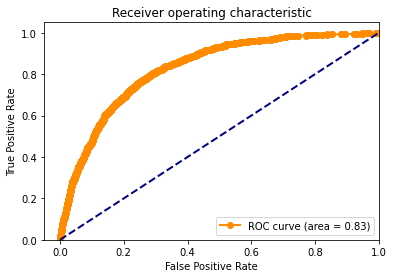

In [0]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, marker='o',color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [0]:
gnb_3.fit(X_3, y_3)

GaussianNB(priors=None, var_smoothing=1e-09)

## Predict testing data

In [0]:
pred_val_test = gnb_3.predict(X_test_3)

In [0]:
print("Accuracy from testing data: ", accuracy_score(y_test_3, pred_val_test, normalize = True, sample_weight = None))
print(confusion_matrix(y_test_3, pred_val_test))
print("Classification Report of Naive Bayes Model:","\n",classification_report(y_test_3, pred_val_test))

Accuracy from testing data:  0.7444996451383961
[[742 259]
 [101 307]]
Classification Report of Naive Bayes Model: 
               precision    recall  f1-score   support

           0       0.88      0.74      0.80      1001
           1       0.54      0.75      0.63       408

    accuracy                           0.74      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.78      0.74      0.75      1409



## Logistic Regression (Dataset 1)

In [0]:
#import tools for logisitic regression
from sklearn.linear_model import LogisticRegression

In [0]:
from sklearn.model_selection import GridSearchCV
penalty = ['l1']
C = np.arange(1,5)
solver = ['liblinear','saga']
random_state = [40]
try_grid = [{'penalty': penalty, 'C':C, 'solver':solver, 'random_state':random_state}]

In [0]:
LRM_1_1 = GridSearchCV(LogisticRegression(), param_grid=try_grid, cv=10)
LRM_1_1.fit(X_1,y_1)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': array([1, 2, 3, 4]), 'penalty': ['l1'],
                          'random_state': [40],
                          'solver': ['liblinear', 'saga']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
display(LRM_1_1.best_params_, LRM_1_1.best_score_)

{'C': 3, 'penalty': 'l1', 'random_state': 40, 'solver': 'liblinear'}

0.8058258695186626

In [0]:
penalty = ['l2']
C = np.arange(1,5)
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
random_state = [50]
try_grid_2 = [{'penalty': penalty, 'C':C, 'solver':solver, 'random_state':random_state}]

In [0]:
LRM_1_2 = GridSearchCV(LogisticRegression(), param_grid=try_grid_2, cv=10)
LRM_1_2.fit(X_1,y_1)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': array([1, 2, 3, 4]), 'penalty': ['l2'],
                          'random_state': [50],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, ve

In [0]:
display(LRM_1_2.best_params_, LRM_1_2.best_score_)

{'C': 1, 'penalty': 'l2', 'random_state': 50, 'solver': 'newton-cg'}

0.8056482496252346

## use LRM_1_2

In [0]:
lr_1 = LogisticRegression(penalty='l2', C=1,random_state=50, solver='newton-cg')

In [0]:
# import cross validation and other evaluation tool 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [0]:
# change target column to array
yact = y_1.values.ravel()

In [0]:
score_cv = cross_val_score(lr_1, X_1, yact, cv=10)

In [0]:
# accuracy from cross validation
score_cv.mean()

0.8056482496252346

In [0]:
#predict value of target based on cross validation
pred_y = cross_val_predict(lr_1, X_1, yact, cv=10)

In [0]:
# Confusion matrix
print(confusion_matrix(y_1, pred_y))

[[3682  426]
 [ 669  857]]


In [0]:
print(classification_report(yact, pred_y))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4108
           1       0.67      0.56      0.61      1526

    accuracy                           0.81      5634
   macro avg       0.76      0.73      0.74      5634
weighted avg       0.80      0.81      0.80      5634



## ROC Curve

In [0]:
# probablities for each prediction
proba_y = cross_val_predict(lr_1, X_1, yact, cv=10, method='predict_proba')
proba_y

array([[0.83602955, 0.16397045],
       [0.6082178 , 0.3917822 ],
       [0.3155261 , 0.6844739 ],
       ...,
       [0.61036659, 0.38963341],
       [0.99197213, 0.00802787],
       [0.97237623, 0.02762377]])

In [0]:
# probabilities of being '0' for all instances at default threshold of 0.5
proba_y_0 = proba_y[:,0]
proba_y_0

array([0.83602955, 0.6082178 , 0.3155261 , ..., 0.61036659, 0.99197213,
       0.97237623])

In [0]:
# Increase threshold for '0' to be 0.7
proba_y_0_lt= [0 if i >= 0.7 else 1 for i in proba_y_0]
proba_y_0_lt

[0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,


In [0]:
print("Confusion Matrix:", '\n',confusion_matrix(y_1, proba_y_0_lt))

Confusion Matrix: 
 [[3122  986]
 [ 354 1172]]


In [0]:
print("Accuracy:",accuracy_score(y_1, proba_y_0_lt, normalize=True, sample_weight=None))

Accuracy: 0.762158324458644


In [0]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
import matplotlib as mpl
import matplotlib.pyplot as plt

In [0]:
# calculate tpr and fpr based on different thresholds
fpr, tpr, thresholds = metrics.roc_curve(yact,proba_y_0,pos_label=0)

In [0]:
#Area under curve
metrics.auc(fpr, tpr)

0.844350233728645

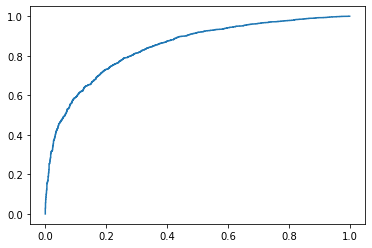

In [0]:
plt.plot(fpr,tpr)

In [0]:
# train model using training dataset
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit
lr_1.fit(X_1, yact)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=50, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# show the intercept of the trained model (Theta_0)
lr_1.intercept_

array([-1.66172911])

In [0]:
# show the coefficients of independent attributes
coeff_df = pd.DataFrame(lr_1.coef_.flatten(), X_1.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
SeniorCitizen,1.775793e-01
tenure,-5.150078e-02
MonthlyCharges,-3.940698e-03
TotalCharges,2.403919e-04
gender_Male,-1.051838e-02
Partner_Yes,-5.580209e-02
Dependents_Yes,-8.367250e-02
PhoneService_Yes,-2.067587e-01
MultipleLines_No,-2.223004e-01
MultipleLines_Yes,1.554171e-02


In [0]:
print('Area Under Curve:', "%.4f" % metrics.auc(fpr, tpr))
print('Cross Validation Score:', "%.4f" % score_cv.mean())
for j in range(4, 7):
    print('Confusion Matrix', 'with thresold', float(j)/float(10), ':', '\n',
          confusion_matrix(y_1, [0 if i >= float(j)/float(10) else 1 for i in proba_y_0]))
    print(classification_report(y_1, [0 if i >= float(j)/float(10) else 1 for i in proba_y_0]))

Area Under Curve: 0.8444
Cross Validation Score: 0.8056
Confusion Matrix with thresold 0.4 : 
 [[3859  249]
 [ 908  618]]
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      4108
           1       0.71      0.40      0.52      1526

    accuracy                           0.79      5634
   macro avg       0.76      0.67      0.69      5634
weighted avg       0.78      0.79      0.77      5634

Confusion Matrix with thresold 0.5 : 
 [[3682  426]
 [ 669  857]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4108
           1       0.67      0.56      0.61      1526

    accuracy                           0.81      5634
   macro avg       0.76      0.73      0.74      5634
weighted avg       0.80      0.81      0.80      5634

Confusion Matrix with thresold 0.6 : 
 [[3420  688]
 [ 499 1027]]
              precision    recall  f1-score   support

           0       0.87      0.83    

## Predict testing data

In [0]:
pred_val_test = LRM_1_2.predict(X_test_1)

In [0]:
print("Accuracy from testing data: ", accuracy_score(y_test_1, pred_val_test, normalize = True, sample_weight = None))
print(confusion_matrix(y_test_1, pred_val_test))
print("Classification Report of Naive Bayes Model:","\n",classification_report(y_test_1, pred_val_test))

Accuracy from testing data:  0.8041163946061036
[[948 118]
 [158 185]]
Classification Report of Naive Bayes Model: 
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      1066
           1       0.61      0.54      0.57       343

    accuracy                           0.80      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.80      0.80      0.80      1409



## Logistic Regression (Dataset 2)

In [0]:
LRM_2_1 = GridSearchCV(LogisticRegression(), param_grid=try_grid, cv=10)
LRM_2_1.fit(X_2,y_2)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': array([1, 2, 3, 4]), 'penalty': ['l1'],
                          'random_state': [40],
                          'solver': ['liblinear', 'saga']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
display(LRM_2_1.best_params_, LRM_2_1.best_score_)

{'C': 2, 'penalty': 'l1', 'random_state': 40, 'solver': 'saga'}

0.7994353325019211

In [0]:
LRM_2_2 = GridSearchCV(LogisticRegression(), param_grid=try_grid_2, cv=10)
LRM_2_2.fit(X_2,y_2)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': array([1, 2, 3, 4]), 'penalty': ['l2'],
                          'random_state': [50],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, ve

In [0]:
display(LRM_2_2.best_params_, LRM_2_2.best_score_)

{'C': 4, 'penalty': 'l2', 'random_state': 50, 'solver': 'newton-cg'}

0.7999678772533162

## use LRM_2_2

In [0]:
lr_2 = LogisticRegression(penalty='l2', C=2,random_state=50, solver='saga')

In [0]:
yact = y_2.values.ravel()

In [0]:
score_cv = cross_val_score(lr_2, X_2, yact, cv=10)

In [0]:
score_cv.mean()

0.7989024728216368

In [0]:
pred_y = cross_val_predict(lr_2, X_2, yact, cv=10)

In [0]:
print(confusion_matrix(y_2, pred_y))

[[3664  447]
 [ 686  837]]


In [0]:
print(classification_report(yact, pred_y))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      4111
           1       0.65      0.55      0.60      1523

    accuracy                           0.80      5634
   macro avg       0.75      0.72      0.73      5634
weighted avg       0.79      0.80      0.79      5634



## ROC Curve

In [0]:
proba_y = cross_val_predict(lr_2, X_2, yact, cv=10, method='predict_proba')
proba_y

array([[0.82338059, 0.17661941],
       [0.62184868, 0.37815132],
       [0.34900985, 0.65099015],
       ...,
       [0.3512466 , 0.6487534 ],
       [0.62999956, 0.37000044],
       [0.97980822, 0.02019178]])

In [0]:
proba_y_0 = proba_y[:,0]
proba_y_0

array([0.82338059, 0.62184868, 0.34900985, ..., 0.3512466 , 0.62999956,
       0.97980822])

In [0]:
proba_y_0_lt= [0 if i >= 0.7 else 1 for i in proba_y_0]
proba_y_0_lt

[0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,


In [0]:
print("Confusion Matrix:", '\n',confusion_matrix(y_2, proba_y_0_lt))

Confusion Matrix: 
 [[3086 1025]
 [ 352 1171]]


In [0]:
print("Accuracy:",accuracy_score(y_2, proba_y_0_lt, normalize=True, sample_weight=None))

Accuracy: 0.755591054313099


In [0]:
display(yact, proba_y_0)

array([0, 0, 1, ..., 1, 0, 0])

array([0.82338059, 0.62184868, 0.34900985, ..., 0.3512466 , 0.62999956,
       0.97980822])

In [0]:
fpr, tpr, thresholds = metrics.roc_curve(yact,proba_y_0,pos_label=0)

In [0]:
metrics.auc(fpr, tpr)

0.8416847773050316

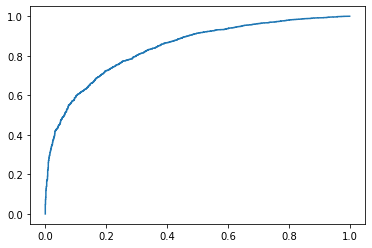

In [0]:
plt.plot(fpr,tpr)

In [0]:
lr_2.fit(X_2, yact)

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=50, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
lr_2.intercept_

array([-2.61419863])

In [0]:
coeff_df = pd.DataFrame(lr_2.coef_.flatten(), X_2.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
SeniorCitizen,0.248867
gender_Male,-0.067406
Partner_Yes,0.031870
Dependents_Yes,-0.144406
PhoneService_Yes,-0.282461
MultipleLines_No,-0.245014
MultipleLines_Yes,-0.037448
InternetService_DSL,-0.229731
InternetService_Fiber optic,0.512922
OnlineSecurity_No,0.350152


In [0]:
print('Area Under Curve:', "%.4f" % metrics.auc(fpr, tpr))
print('Cross Validation Score:', "%.4f" % score_cv.mean())
for j in range(4, 7):
    print('Confusion Matrix', 'with thresold', float(j)/float(10), ':', '\n',
          confusion_matrix(y_2, [0 if i >= float(j)/float(10) else 1 for i in proba_y_0]))
    print(classification_report(y_2, [0 if i >= float(j)/float(10) else 1 for i in proba_y_0]))

Area Under Curve: 0.8417
Cross Validation Score: 0.7989
Confusion Matrix with thresold 0.4 : 
 [[3867  244]
 [ 932  591]]
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      4111
           1       0.71      0.39      0.50      1523

    accuracy                           0.79      5634
   macro avg       0.76      0.66      0.68      5634
weighted avg       0.78      0.79      0.77      5634

Confusion Matrix with thresold 0.5 : 
 [[3664  447]
 [ 686  837]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      4111
           1       0.65      0.55      0.60      1523

    accuracy                           0.80      5634
   macro avg       0.75      0.72      0.73      5634
weighted avg       0.79      0.80      0.79      5634

Confusion Matrix with thresold 0.6 : 
 [[3385  726]
 [ 503 1020]]
              precision    recall  f1-score   support

           0       0.87      0.82    

## Predict testing data

In [0]:
pred_val_test = LRM_2_2.predict(X_test_2)

In [0]:
print("Accuracy from testing data: ", accuracy_score(y_test_2, pred_val_test, normalize = True, sample_weight = None))
print(confusion_matrix(y_test_2, pred_val_test))
print("Classification Report of Naive Bayes Model:","\n",classification_report(y_test_2, pred_val_test))

Accuracy from testing data:  0.8190205819730305
[[945 118]
 [137 209]]
Classification Report of Naive Bayes Model: 
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      1063
           1       0.64      0.60      0.62       346

    accuracy                           0.82      1409
   macro avg       0.76      0.75      0.75      1409
weighted avg       0.82      0.82      0.82      1409



## Logistic Regression (Dataset 3)

In [0]:
LRM_3_1 = GridSearchCV(LogisticRegression(), param_grid=try_grid, cv=10)
LRM_3_1.fit(X_3,y_3)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': array([1, 2, 3, 4]), 'penalty': ['l1'],
                          'random_state': [40],
                          'solver': ['liblinear', 'saga']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
display(LRM_3_1.best_params_, LRM_3_1.best_score_)

{'C': 1, 'penalty': 'l1', 'random_state': 40, 'solver': 'liblinear'}

0.8065363490923749

In [0]:
LRM_3_2 = GridSearchCV(LogisticRegression(), param_grid=try_grid_2, cv=10)
LRM_3_2.fit(X_3,y_3)


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': array([1, 2, 3, 4]), 'penalty': ['l2'],
                          'random_state': [50],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, ve

In [0]:
display(LRM_3_2.best_params_, LRM_3_2.best_score_)

{'C': 3, 'penalty': 'l2', 'random_state': 50, 'solver': 'newton-cg'}

0.8074244485595152

## use LRM_3_2

In [0]:
lr_3 = LogisticRegression(penalty='l2', C=1.0,random_state=50, solver='liblinear')

In [0]:
yact = y_3.values.ravel()

In [0]:
score_cv = cross_val_score(lr_3, X_3, yact, cv=10)

In [0]:
score_cv.mean()

0.8060038043409797

In [0]:
pred_y = cross_val_predict(lr_3, X_3, yact, cv=10)

In [0]:
print(confusion_matrix(y_3, pred_y))

[[3756  417]
 [ 676  785]]


In [0]:
print(classification_report(yact, pred_y))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4173
           1       0.65      0.54      0.59      1461

    accuracy                           0.81      5634
   macro avg       0.75      0.72      0.73      5634
weighted avg       0.80      0.81      0.80      5634



## ROC Curve

In [0]:
proba_y = cross_val_predict(lr_3, X_3, yact, cv=10, method='predict_proba')
proba_y

array([[0.6369891 , 0.3630109 ],
       [0.34899616, 0.65100384],
       [0.26230411, 0.73769589],
       ...,
       [0.60200407, 0.39799593],
       [0.99490221, 0.00509779],
       [0.97870177, 0.02129823]])

In [0]:
proba_y_0 = proba_y[:,0]
proba_y_0

array([0.6369891 , 0.34899616, 0.26230411, ..., 0.60200407, 0.99490221,
       0.97870177])

In [0]:
proba_y_0_lt= [0 if i >= 0.7 else 1 for i in proba_y_0]
proba_y_0_lt

[1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,


In [0]:
print("Confusion Matrix:", '\n',confusion_matrix(y_3, proba_y_0_lt))

Confusion Matrix: 
 [[3210  963]
 [ 354 1107]]


In [0]:
print("Accuracy:",accuracy_score(y_3, proba_y_0_lt, normalize=True, sample_weight=None))

Accuracy: 0.7662406815761449


In [0]:
fpr, tpr, thresholds = metrics.roc_curve(yact,proba_y_0,pos_label=0)

In [0]:
metrics.auc(fpr, tpr)

0.8460800363734597

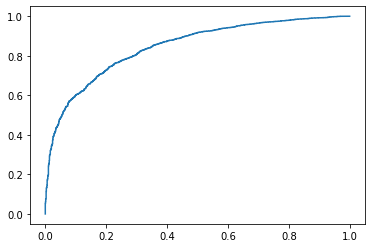

In [0]:
plt.plot(fpr,tpr)

In [0]:
lr_3.fit(X_3, yact)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=50, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
lr_3.intercept_

array([-1.64955954])

In [0]:
coeff_df = pd.DataFrame(lr_3.coef_.flatten(), X_3.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
gender,-0.011252
SeniorCitizen,0.280746
Partner,0.027269
Dependents,-0.120246
tenure_normalize,-1.418198
PaperlessBilling,0.279519
MonthlyCharges_normalize,0.511374
TotalCharges_normalize,0.644958
MultipleLines_No,-0.885050
MultipleLines_Yes,-0.754432


In [0]:
print('Area Under Curve:', "%.4f" % metrics.auc(fpr, tpr))
print('Cross Validation Score:', "%.4f" % score_cv.mean())
for j in range(4, 7):
    print('Confusion Matrix', 'with thresold', float(j)/float(10), ':', '\n',
          confusion_matrix(y_3, [0 if i >= float(j)/float(10) else 1 for i in proba_y_0]))
    print(classification_report(y_3, [0 if i >= float(j)/float(10) else 1 for i in proba_y_0]))

Area Under Curve: 0.8461
Cross Validation Score: 0.8060
Confusion Matrix with thresold 0.4 : 
 [[3946  227]
 [ 908  553]]
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      4173
           1       0.71      0.38      0.49      1461

    accuracy                           0.80      5634
   macro avg       0.76      0.66      0.68      5634
weighted avg       0.79      0.80      0.78      5634

Confusion Matrix with thresold 0.5 : 
 [[3756  417]
 [ 676  785]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4173
           1       0.65      0.54      0.59      1461

    accuracy                           0.81      5634
   macro avg       0.75      0.72      0.73      5634
weighted avg       0.80      0.81      0.80      5634

Confusion Matrix with thresold 0.6 : 
 [[3509  664]
 [ 505  956]]
              precision    recall  f1-score   support

           0       0.87      0.84    

## Predict testing data

In [0]:
pred_val_test = LRM_3_2.predict(X_test_3)

In [0]:
print("Accuracy from testing data: ", accuracy_score(y_test_3, pred_val_test, normalize = True, sample_weight = None))
print(confusion_matrix(y_test_3, pred_val_test))
print("Classification Report of Naive Bayes Model:","\n",classification_report(y_test_3, pred_val_test))

Accuracy from testing data:  0.794180269694819
[[901 100]
 [190 218]]
Classification Report of Naive Bayes Model: 
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1001
           1       0.69      0.53      0.60       408

    accuracy                           0.79      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.79      0.79      0.79      1409



# DTM (Dataset 1)

In [0]:
from sklearn.tree import DecisionTreeClassifier
DTM_1_1 = DecisionTreeClassifier(random_state=60)
DTM_1_1.fit(X_1, y_1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=60, splitter='best')

In [0]:
print('depth: ', DTM_1_1.get_depth(),'\n',
      'leaves: ', DTM_1_1.get_n_leaves())

depth:  26 
 leaves:  1099


In [0]:
score_cv = cross_val_score(DecisionTreeClassifier(), X_1, y_1, cv=10)
score_cv.mean()

0.726655896098661

In [0]:
max_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
num_leaf = [5, 10, 20, 50, 100, 200, 500, 1000, 1100]
try_grid = [{'max_depth':max_depth, 
           'max_leaf_nodes':num_leaf}]
try_grid

[{'max_depth': [1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26],
  'max_leaf_nodes': [5, 10, 20, 50, 100, 200, 500, 1000, 1100]}]

In [0]:
DTM_1_2 = GridSearchCV(DecisionTreeClassifier(random_state=70), param_grid = try_grid, cv = 10)
DTM_1_2.fit(X_1, y_1)
print(DTM_1_2.best_params_, DTM_1_2.best_score_)

{'max_depth': 7, 'max_leaf_nodes': 20} 0.7948175302016806


# Use DTM_1_2

In [0]:
clf_1 = DecisionTreeClassifier(max_depth=7, max_leaf_nodes=20, random_state=70)
clf_1.fit(X_1, y_1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=70, splitter='best')

In [0]:
yact = y_1.values.ravel()

In [0]:
pred_y = cross_val_predict(clf_1, X_1, yact, cv=10)

In [0]:
print(accuracy_score(yact, pred_y, normalize=True))

0.7948171813986511


In [0]:
print(classification_report(yact, pred_y))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      4108
           1       0.65      0.52      0.58      1526

    accuracy                           0.79      5634
   macro avg       0.74      0.71      0.72      5634
weighted avg       0.78      0.79      0.79      5634



# ROC Curve


In [0]:
proba_y = cross_val_predict(clf_1, X_1, yact, cv=10, method='predict_proba')

In [0]:
proba_y_0 = proba_y[:,0]
proba_y_0

array([0.96474359, 0.83815029, 0.46236559, ..., 0.3381295 , 0.95875635,
       0.95875635])

In [0]:
fpr, tpr, thresholds = metrics.roc_curve(yact,proba_y_0,pos_label=0)

In [0]:
metrics.auc(fpr, tpr)

0.8234094902890629

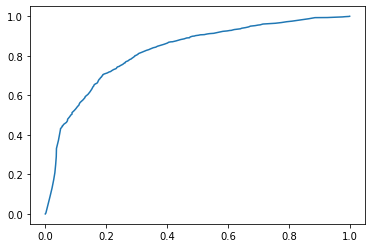

In [0]:
plt.plot(fpr,tpr)

# Predict Testing data


In [0]:
pred_val_test = clf_1.predict(X_test_1)

In [0]:
print("Accuracy from testing data: ", accuracy_score(y_test_1, pred_val_test, normalize = True, sample_weight = None))
print(confusion_matrix(y_test_1, pred_val_test))
print("Classification Report of Decision Tree Model:","\n",classification_report(y_test_1, pred_val_test))

Accuracy from testing data:  0.7913413768630234
[[951 115]
 [179 164]]
Classification Report of Decision Tree Model: 
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1066
           1       0.59      0.48      0.53       343

    accuracy                           0.79      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



# DTM (Dataset 2)


In [0]:
DTM_2_1 = DecisionTreeClassifier(random_state=80)
DTM_2_1.fit(X_2, y_2)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=80, splitter='best')

In [0]:
print(DTM_2_1.get_depth(), DTM_2_1.get_n_leaves())

24 1141


In [0]:
score_cv = cross_val_score(DecisionTreeClassifier(), X_2, y_2, cv=10)
score_cv.mean()

0.7183257120542181

In [0]:
num_leaf = [5, 10, 20, 50, 100, 200, 500, 1000, 1100]
depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
try_grid = [{'max_depth':depths, 
           'max_leaf_nodes':num_leaf}]
try_grid

[{'max_depth': [1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26],
  'max_leaf_nodes': [5, 10, 20, 50, 100, 200, 500, 1000, 1100]}]

In [0]:
DTM_2_2 = GridSearchCV(DecisionTreeClassifier(random_state=90), param_grid = try_grid, cv = 10)
DTM_2_2.fit(X_2, y_2)
print(DTM_2_2.best_params_, DTM_2_2.best_score_)

{'max_depth': 9, 'max_leaf_nodes': 50} 0.7841704143204465


# Use DTM_2_2

In [0]:
clf_2 = DecisionTreeClassifier(max_depth=7, max_leaf_nodes=20, random_state=90)
clf_2.fit(X_2, y_2)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=90, splitter='best')

In [0]:
yact = y_2.values.ravel()

In [0]:
pred_y = cross_val_predict(clf_2, X_2, yact, cv=10)

In [0]:
print(accuracy_score(yact, pred_y, normalize=True))

0.7783102591409301


In [0]:
print(classification_report(yact, pred_y))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      4111
           1       0.60      0.53      0.56      1523

    accuracy                           0.78      5634
   macro avg       0.72      0.70      0.71      5634
weighted avg       0.77      0.78      0.77      5634



# ROC curve


In [0]:
proba_y = cross_val_predict(clf_2, X_2, yact, cv=10, method='predict_proba')

In [0]:
proba_y_0 = proba_y[:,0]
proba_y_0

array([0.96097845, 0.7816092 , 0.43367347, ..., 0.41949153, 0.43457944,
       0.95682614])

In [0]:
fpr, tpr, thresholds = metrics.roc_curve(yact,proba_y_0,pos_label=0)

In [0]:
metrics.auc(fpr, tpr)

0.8152028101343335

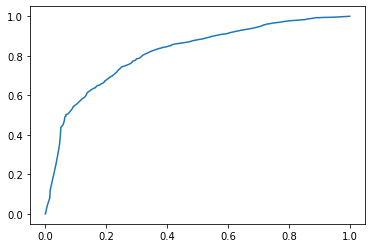

In [0]:
plt.plot(fpr,tpr)

# Predict testing data


In [0]:
pred_val_test = clf_2.predict(X_test_2)

In [0]:
print("Accuracy from testing data: ", accuracy_score(y_test_2, pred_val_test, normalize = True, sample_weight = None))
print(confusion_matrix(y_test_2, pred_val_test))
print("Classification Report of Decision Tree Model:","\n",classification_report(y_test_2, pred_val_test))

Accuracy from testing data:  0.8034066713981547
[[929 134]
 [143 203]]
Classification Report of Decision Tree Model: 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      1063
           1       0.60      0.59      0.59       346

    accuracy                           0.80      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.80      0.80      0.80      1409



# DTM (Dataset 3)

In [0]:
DTM_3_1 = DecisionTreeClassifier(random_state=100)
DTM_3_1.fit(X_3, y_3)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [0]:
print(DTM_3_1.get_depth(), DTM_3_1.get_n_leaves())

27 1083


In [0]:
score_cv = cross_val_score(DecisionTreeClassifier(), X_3, y_3, cv=10)
score_cv.mean()

0.7298539989670332

In [0]:
num_leaf = [5, 10, 20, 50, 100, 200, 500, 1000, 1100]
depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
try_grid = [{'max_depth':depths, 
           'max_leaf_nodes':num_leaf}]
try_grid

[{'max_depth': [1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28],
  'max_leaf_nodes': [5, 10, 20, 50, 100, 200, 500, 1000, 1100]}]

In [0]:
DTM_3_2 = GridSearchCV(DecisionTreeClassifier(), param_grid = try_grid, cv = 10)
DTM_3_2.fit(X_3, y_3)
print(DTM_3_2.best_params_, DTM_3_2.best_score_)

{'max_depth': 4, 'max_leaf_nodes': 10} 0.7964113853091972


# Use DTM_3_2

In [0]:
clf_3 = DecisionTreeClassifier(max_depth=8, max_leaf_nodes=50, random_state=100)
clf_3.fit(X_3, y_3)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=50,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [0]:
yact = y_3.values.ravel()

In [0]:
pred_y = cross_val_predict(clf_3, X_3, yact, cv=10)

In [0]:
print(accuracy_score(yact, pred_y, normalize=True))

0.7928647497337593


In [0]:
print(classification_report(yact, pred_y))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      4173
           1       0.63      0.49      0.55      1461

    accuracy                           0.79      5634
   macro avg       0.73      0.69      0.71      5634
weighted avg       0.78      0.79      0.78      5634



# ROC Curve

In [0]:
proba_y = cross_val_predict(clf_3, X_3, yact, cv=10, method='predict_proba')

In [0]:
proba_y_0 = proba_y[:,0]
proba_y_0

array([0.86603774, 0.54901961, 0.37172775, ..., 0.35135135, 0.98662207,
       0.98662207])

In [0]:
fpr, tpr, thresholds = metrics.roc_curve(yact,proba_y_0,pos_label=0)

In [0]:
metrics.auc(fpr, tpr)

0.8238975730196056

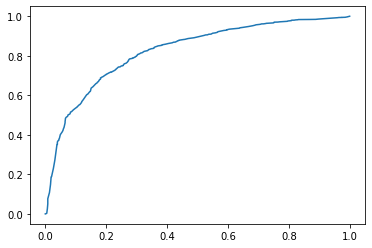

In [0]:
plt.plot(fpr,tpr)

# Predict testing data

In [0]:
pred_val_test = clf_3.predict(X_test_3)

In [0]:
print("Accuracy from testing data: ", accuracy_score(y_test_3, pred_val_test, normalize = True, sample_weight = None))
print(confusion_matrix(y_test_3, pred_val_test))
print("Classification Report of Decision Tree Model:","\n",classification_report(y_test_3, pred_val_test))

Accuracy from testing data:  0.7757274662881476
[[900 101]
 [215 193]]
Classification Report of Decision Tree Model: 
               precision    recall  f1-score   support

           0       0.81      0.90      0.85      1001
           1       0.66      0.47      0.55       408

    accuracy                           0.78      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.76      0.78      0.76      1409



## The Ensemble (Dataset 1)



In [0]:
from sklearn.ensemble import VotingClassifier

In [0]:
estimators=[('LRM', LRM_1_2), ('GNB', gnb_1), ('DTM', clf_1)]

In [0]:
ensemble = VotingClassifier(estimators, voting='hard')

In [0]:
ensemble.fit(X_1, y_1)

VotingClassifier(estimators=[('LRM',
                              GridSearchCV(cv=10, error_score=nan,
                                           estimator=LogisticRegression(C=1.0,
                                                                        class_weight=None,
                                                                        dual=False,
                                                                        fit_intercept=True,
                                                                        intercept_scaling=1,
                                                                        l1_ratio=None,
                                                                        max_iter=100,
                                                                        multi_class='auto',
                                                                        n_jobs=None,
                                                                        penalty='l2',
                     

In [0]:
Accuracy_ensemble = cross_val_score (ensemble,X_1,y_1,cv=10).mean()
Accuracy_ensemble

0.802276620938992

## The Ensemble (Dataset 2)



In [0]:
estimators=[('LRM', LRM_2_2), ('GNB', gnb_2), ('DTM', clf_2)]

In [0]:
ensemble = VotingClassifier(estimators, voting='hard')

In [0]:
ensemble.fit(X_2, y_2)

VotingClassifier(estimators=[('LRM',
                              GridSearchCV(cv=10, error_score=nan,
                                           estimator=LogisticRegression(C=1.0,
                                                                        class_weight=None,
                                                                        dual=False,
                                                                        fit_intercept=True,
                                                                        intercept_scaling=1,
                                                                        l1_ratio=None,
                                                                        max_iter=100,
                                                                        multi_class='auto',
                                                                        n_jobs=None,
                                                                        penalty='l2',
                     

In [0]:
Accuracy_ensemble = cross_val_score (ensemble,X_2,y_2,cv=10).mean()
Accuracy_ensemble

0.7873672574732626

## The Ensemble (Dataset 3)



In [0]:
estimators=[('LRM', LRM_3_2), ('GNB', gnb_3), ('DTM', clf_3)]

In [0]:
ensemble = VotingClassifier(estimators, voting='hard')

In [0]:
ensemble.fit(X_3, y_3)

VotingClassifier(estimators=[('LRM',
                              GridSearchCV(cv=10, error_score=nan,
                                           estimator=LogisticRegression(C=1.0,
                                                                        class_weight=None,
                                                                        dual=False,
                                                                        fit_intercept=True,
                                                                        intercept_scaling=1,
                                                                        l1_ratio=None,
                                                                        max_iter=100,
                                                                        multi_class='auto',
                                                                        n_jobs=None,
                                                                        penalty='l2',
                     

In [0]:
Accuracy_ensemble = cross_val_score (ensemble,X_3,y_3,cv=10).mean()
Accuracy_ensemble

0.8001467568623004